In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.optimize import fsolve

sn.set_style('whitegrid')
%matplotlib inline

In [7]:
# Expanded and modified version (first column now string)
def read_table(filename,keyword='ciclo',rescale=1,ncols=5,start=2,end_row='Total',
               endword=None,omit_list=['t20_21'],index_to_int=True,debug=False):
    t0 = start
    t1 = ncols+start
    results_follow = 0
    row_names = []
    f = open(filename,'r')
    for line in f:
        words = line.split()
        if debug:
            print(words)
        if len(words)>1 and words[0] == keyword:
            results_follow=1
            if endword==None:
                colnames = words[t0:t1]
            else:
                buff_v = []
                for w in words[t0:]:
                    if w==endword:
                        break
                    else:
                        buff_v.append(w)
                colnames = buff_v[:-1]
                t1 = len(buff_v)+t0-1
            table_raw = np.empty(t1-t0)
        elif len(words)>1 and words[0] == end_row:
            break
        elif len(words)>1 and results_follow==1 and words[0] not in omit_list:
            row_names.append(words[0])
            buff_v = []
            for w in words[t0:t1]: 
                w = w.replace(",","")
                buff_v.append(w)
            table_raw = np.vstack((table_raw,np.array(buff_v,dtype=float)/rescale))
    table_raw = table_raw[1:,:]
    if debug:
        print(table_raw.shape)
        print(colnames)
    if index_to_int:
        return pd.DataFrame(table_raw, columns=colnames,index=np.array(row_names,dtype=int))
    else:
        return pd.DataFrame(table_raw, columns=colnames,index=np.array(row_names))
    
    
def file_split(filename,path,startwords=['Summary',],endword="Total",header=None):
    f = open(path+filename,'r')
    parent_file = filename[:filename.find('.')]
    di = 1
    writing = 0
    for line in f:
        words = line.split()
        if len(words)>0 and words[0] in startwords:
            sf = open(path+parent_file+'_{}.log'.format(di), "w")
            writing = 1
            if header!=None:
                sf.write(header)
        elif len(words)>0 and words[0]==endword and writing:
            sf.write(line)
            writing = 0
            sf.close()
            di+=1
        if writing:
            sf.write(line)
            
def normalise_table(table):
    cols = table.columns
    table['Total'] = table.sum(axis=1).copy()
    for col in cols:
        table[col] = table[col]/table['Total']
    return table

In [8]:
dates = []
for year in range(1987,2023):
    for quarter in range(1,5):
        dates.append(str(year)+"Q"+str(quarter))
dates = dates[1:]

t0 = 59
T = len(dates)
date_dict = dict(zip(range(t0,T+t0),dates))
date_dict_reverse = dict(zip(dates,range(0,T)))
date_dict_reverse_ciclo = dict(zip(dates,range(t0,T+t0)))

In [9]:
path = 'descriptive_stats/'

file_split('mother_child_ages.log',path,startwords=['groups',],endword="Total",header=None)

data_hist_moms = []

for i in range(1,4):
    data_hist_moms.append(read_table(path+'mother_child_ages_{}.log'.format(i),keyword='groups',rescale=1,ncols=2,start=2,end_row='Total',
                   endword=None,omit_list=['t20_21'],index_to_int=True,debug=False))
data_5, data_10, data_15 = data_hist_moms

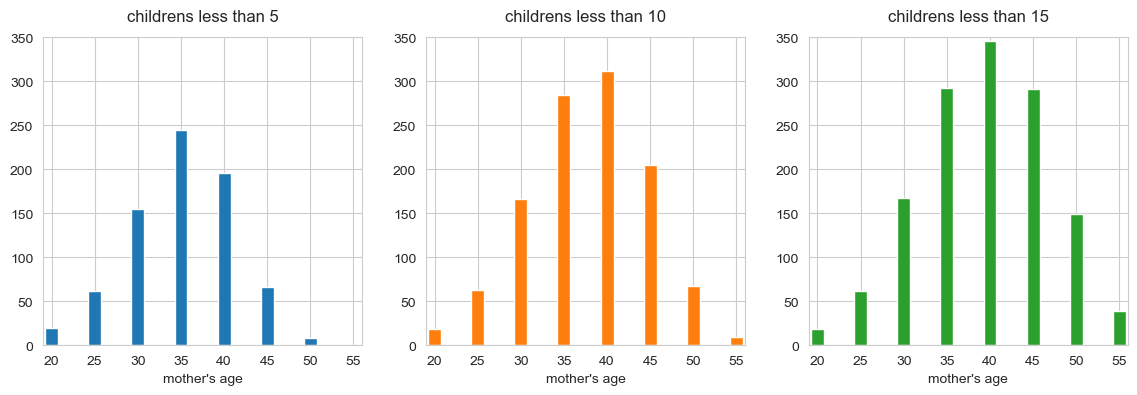

In [5]:
colors= sn.color_palette()

plt.figure(figsize=(14,4))
plt.subplot(131)
plt.bar(data_5['1'].index,data_5['1'].values,label='5',width=1.5)
# plt.bar(data_10['1'].index+1.5,data_10['1'].values,label='10',width=1.5)
# plt.bar(data_15['1'].index+3,data_15['1'].values,label='15',width=1.5)
plt.yticks(np.arange(0,4e5,5e4),np.arange(0,400,50))
plt.title("childrens less than 5", y=1.025)
plt.xlim(19,56)
plt.xticks(np.arange(20,60,5))
plt.xlabel("mother's age")

plt.subplot(132)
# plt.bar(data_5['1'].index,data_5['1'].values,label='5',width=1.5)
plt.bar(data_10['1'].index,data_10['1'].values,label='10',width=1.5,color=colors[1])
# plt.bar(data_15['1'].index+3,data_15['1'].values,label='15',width=1.5)
plt.yticks(np.arange(0,4e5,5e4),np.arange(0,400,50))
plt.title("childrens less than 10", y=1.025)
plt.xlim(19,56)
plt.xticks(np.arange(20,60,5))
# plt.ylabel('thousands')
plt.xlabel("mother's age")

plt.subplot(133)
# plt.bar(data_5['1'].index,data_5['1'].values,label='5',width=1.5)
# plt.bar(data_10['1'].index+1.5,data_10['1'].values,label='10',width=1.5)
plt.bar(data_15['1'].index,data_15['1'].values,label='15',width=1.5,color=colors[2])
plt.yticks(np.arange(0,4e5,5e4),np.arange(0,400,50))
plt.title("childrens less than 15", y=1.025)
plt.xlim(19,56)
plt.xticks(np.arange(20,60,5))
plt.ylim(0,3.5e5)
plt.xlabel("mother's age")
plt.savefig(path+'mothers_age_histogram.pdf',format='pdf',bbox_inches='tight')
plt.show()

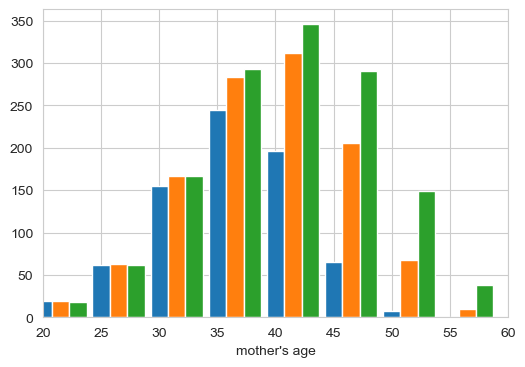

In [22]:
colors= sn.color_palette()

plt.figure(figsize=(6,4))
plt.bar(data_5['1'].index,data_5['1'].values,label='5',width=1.5)
plt.bar(data_10['1'].index+1.5,data_10['1'].values,label='10',width=1.5)
plt.bar(data_15['1'].index+3,data_15['1'].values,label='15',width=1.5)
plt.yticks(np.arange(0,4e5,5e4),np.arange(0,400,50))
# plt.legend(title="childrens' age")
plt.xlim(20,60)
# plt.ylabel('thousands')
plt.xlabel("mother's age")

# plt.savefig(path+'mothers_age_histogram.pdf',format='pdf',bbox_inches='tight')
plt.show()

## Tenure histogrmas and descriptive stats

In [10]:
ten_data = pd.read_csv('./descriptive_stats/tenure_dist.csv')

In [11]:
years_range = ten_data['yd'].unique()
ten_data.head()

sexo1  edad5  ciclo    yd state  wife  husband  mother  mother_5  \
0      1     20    130  2005     T     0        0       0         0   
1      0     45    130  2005     P     0        1       0         0   
2      1     45    130  2005     P     1        0       0         0   
3      1     25    130  2005     T     0        0       0         0   
4      0     55    130  2005     P     0        0       0         0   

   mother_10  ...  father_state  hub_state  hub_ten_y  tenure      ten_y  \
0          0  ...           NaN        NaN        NaN       1        NaN   
1          0  ...           NaN          P  29.916666     359  29.916666   
2          0  ...           NaN          P  29.916666      48   4.000000   
3          0  ...           NaN          P  29.916666      10        NaN   
4          0  ...           NaN        NaN        NaN     387        NaN   

  wife_state wife_ten  disc  part_time  facexp  
0        NaN      NaN     0          0   11288  
1          P     48.0     0          0   18044  
2          P     48.0     0          1   18044  
3          P     48.0     0          0   18044  
4        NaN      NaN     0          0   17475  

[5 rows x 25 columns]

In [12]:
data_all_moms = {}
for age_p in [30,35,40,45]:
    data_all_moms_i = {}
    data_all_moms_i[-1] = ten_data[np.logical_and(ten_data['sexo1']==1,np.logical_and(ten_data['edad5']==age_p,
                                                np.logical_and(ten_data['mother_15']==0,ten_data['wife']==0)))].copy()
    data_all_moms_i[-1]['ten_y'] = data_all_moms_i[-1]['tenure']/12
    data_all_moms_i[0] = ten_data[np.logical_and(ten_data['edad5']==age_p,np.logical_and(ten_data['mother_15']==0,
                                                                                       ten_data['wife']==1))].copy()
    data_all_moms_i[0]['ten_y'] = data_all_moms_i[0]['tenure']/12
    for age_c in [5,10,15]:
        data_all_moms_i[age_c] = ten_data[np.logical_and(ten_data['edad5']==age_p,
                                                         np.logical_and(ten_data['mother_{}'.format(age_c)]==1,
                                                                                       ten_data['wife']==1))].copy()
    data_all_moms[age_p] = data_all_moms_i
    
data_all_dads = {}
for age_p in [30,35,40,45]:
    data_all_dads_i = {}
    data_all_dads_i[-1] = ten_data[np.logical_and(ten_data['sexo1']==0,np.logical_and(ten_data['edad5']==age_p,
                                            np.logical_and(ten_data['father_15']==0,ten_data['husband']==0)))].copy()
    data_all_dads_i[-1]['ten_y'] = data_all_dads_i[-1]['tenure']/12
    data_all_dads_i[0] = ten_data[np.logical_and(ten_data['edad5']==age_p,np.logical_and(ten_data['father_15']==0,
                                                                                       ten_data['husband']==1))].copy()
    data_all_dads_i[0]['ten_y'] = data_all_dads_i[0]['tenure']/12
    for age_c in [5,10,15]:
        data_all_dads_i[age_c] = ten_data[np.logical_and(ten_data['edad5']==age_p,
                                                         np.logical_and(ten_data['father_{}'.format(age_c)]==1,
                                                                                       ten_data['husband']==1))].copy()
    data_all_dads[age_p] = data_all_dads_i

In [13]:
data_all_moms_p = {}
for age_p in [30,35,40,45]:
    data_all_moms_i = {}
    data_all_moms_i[-1] = ten_data[np.logical_and(ten_data['state']=="P",np.logical_and(ten_data['sexo1']==1,
                                                np.logical_and(ten_data['edad5']==age_p,
                                                np.logical_and(ten_data['mother_15']==0,ten_data['wife']==0))))].copy()
    data_all_moms_i[-1]['ten_y'] = data_all_moms_i[-1]['tenure']/12
    data_all_moms_i[0] = ten_data[np.logical_and(ten_data['edad5']==age_p,np.logical_and(ten_data['mother_15']==0,
                                                                                       ten_data['wife']==1))].copy()
    for age_c in [5,10,15]:
        data_all_moms_i[age_c] = ten_data[np.logical_and(ten_data['state']=="P",np.logical_and(ten_data['edad5']==age_p,
                                                         np.logical_and(ten_data['mother_{}'.format(age_c)]==1,
                                                                                       ten_data['wife']==1)))].copy()
    data_all_moms_p[age_p] = data_all_moms_i
    
data_all_dads_p = {}
for age_p in [30,35,40,45]:
    data_all_dads_i = {}
    data_all_dads_i[-1] = ten_data[np.logical_and(ten_data['state']=="P",np.logical_and(ten_data['sexo1']==0,
                                            np.logical_and(ten_data['edad5']==age_p,
                                            np.logical_and(ten_data['father_15']==0,ten_data['husband']==0))))].copy()
    data_all_dads_i[-1]['ten_y'] = data_all_dads_i[-1]['tenure']/12
    data_all_dads_i[0] = ten_data[np.logical_and(ten_data['state']=="P",np.logical_and(ten_data['edad5']==age_p,np.logical_and(ten_data['father_15']==0,
                                                                                       ten_data['husband']==1)))].copy()
    for age_c in [5,10,15]:
        data_all_dads_i[age_c] = ten_data[np.logical_and(ten_data['state']=="P",np.logical_and(ten_data['edad5']==age_p,
                                                         np.logical_and(ten_data['father_{}'.format(age_c)]==1,
                                                                                       ten_data['husband']==1)))].copy()
    data_all_dads_p[age_p] = data_all_dads_i

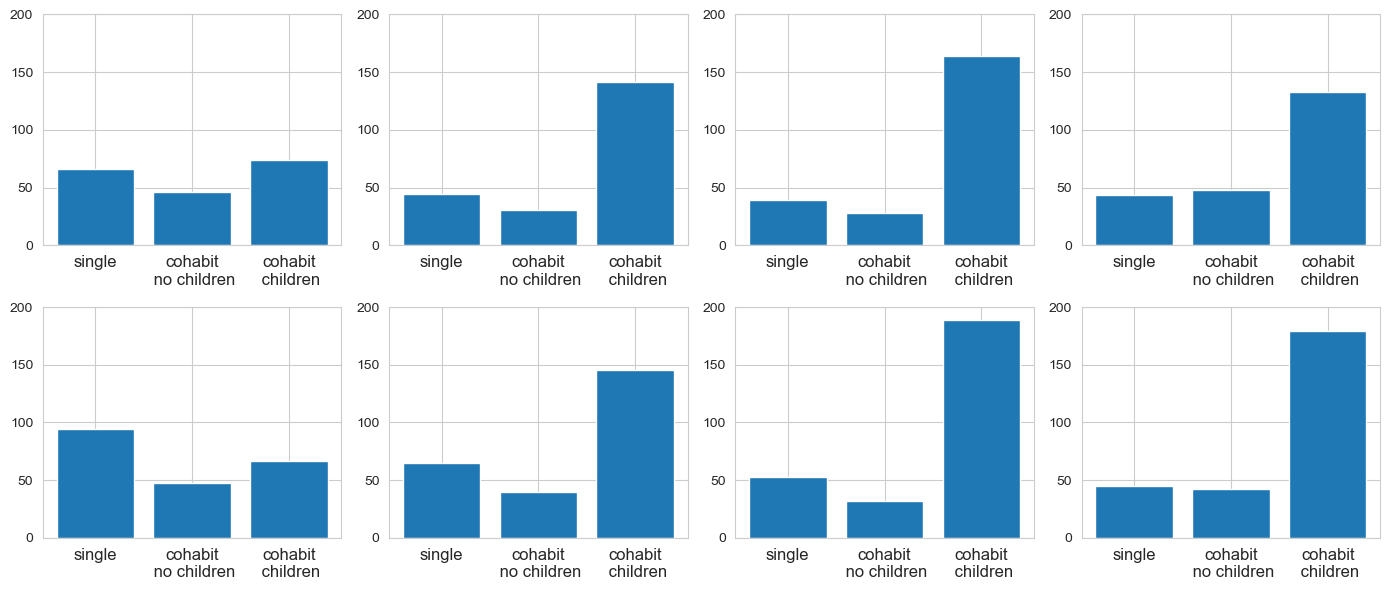

In [88]:
plt.figure(figsize=(14,6))
i=0
for a in [30,35,40,45]:
    data_m, data_d = [], []
    for j in [-1,0,15]:
        data_m.append(data_all_moms[a][j].shape[0])
        data_d.append(data_all_dads[a][j].shape[0])

    plt.subplot(241+i)
    plt.bar(range(3),data_m)
    plt.yticks(np.arange(0,250e3,50e3),np.arange(0,250,50))
    plt.xticks(range(3),['single','cohabit\n no children','cohabit\n children'],fontsize=12)
    plt.subplot(241+i+4)
    plt.bar(range(3),data_d)
    plt.yticks(np.arange(0,250e3,50e3),np.arange(0,250,50))
    plt.xticks(range(3),['single','cohabit\n no children','cohabit\n children'],fontsize=12)
    i+=1
plt.tight_layout()
plt.show()

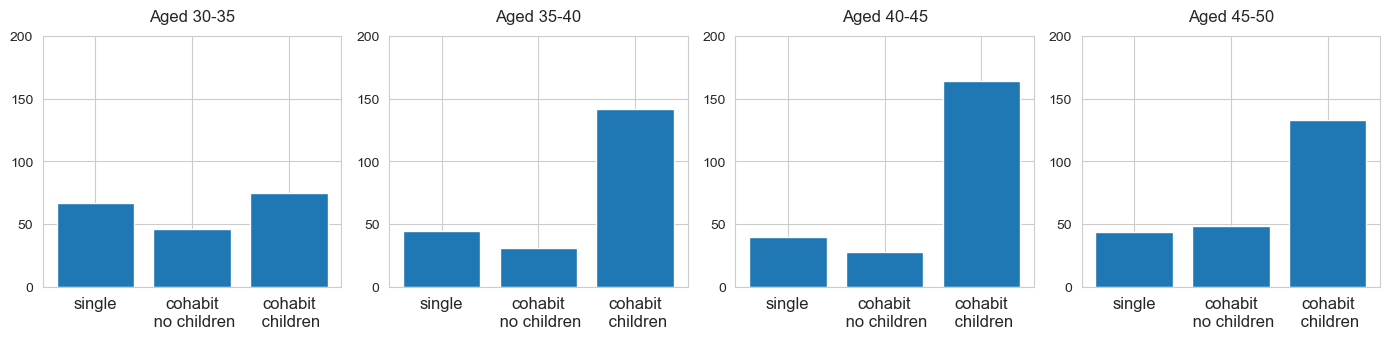

In [80]:
plt.figure(figsize=(14,3.5))
i=0
for a in [30,35,40,45]:
    data_m, data_d = [], []
    for j in [-1,0,15]:
        data_m.append(data_all_moms[a][j].shape[0])

    plt.subplot(141+i)
    plt.title('Aged {}-{}'.format(a,a+5), y=1.025,fontsize=12)
    plt.bar(range(3),data_m)
    plt.yticks(np.arange(0,250e3,50e3),np.arange(0,250,50))
    plt.xticks(range(3),['single','cohabit\n no children','cohabit\n children'],fontsize=12)
    i+=1
plt.tight_layout()
plt.savefig(path+'mothers_obs_histogram.pdf',format='pdf',bbox_inches='tight')
plt.show()

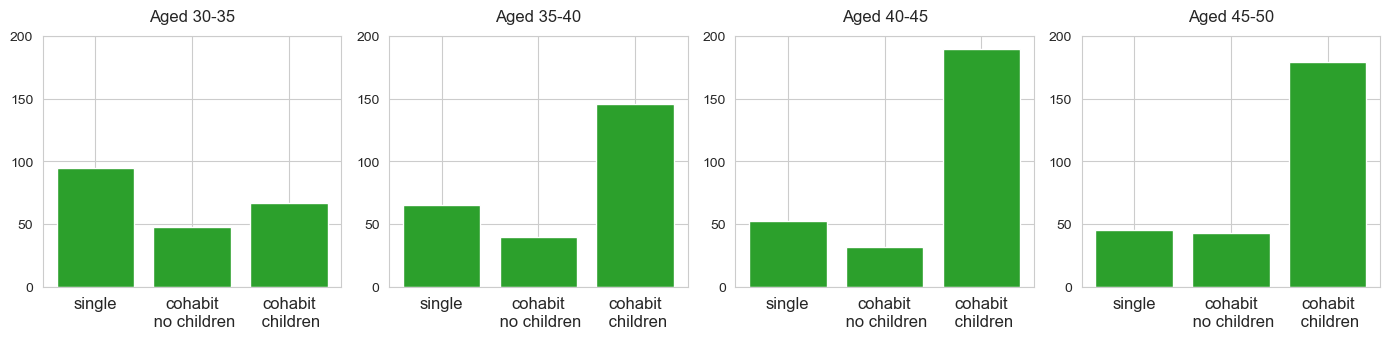

In [81]:
colors= sn.color_palette()
plt.figure(figsize=(14,3.5))
i=0
for a in [30,35,40,45]:
    data_m, data_d = [], []
    for j in [-1,0,15]:
        data_d.append(data_all_dads[a][j].shape[0])

    plt.subplot(141+i)
    plt.title('Aged {}-{}'.format(a,a+5), y=1.025,fontsize=12)
    plt.bar(range(3),data_d,color=colors[2])
    plt.yticks(np.arange(0,250e3,50e3),np.arange(0,250,50))
    plt.xticks(range(3),['single','cohabit\n no children','cohabit\n children'],fontsize=12)
    i+=1
plt.tight_layout()
plt.savefig(path+'fathers_obs_histogram.pdf',format='pdf',bbox_inches='tight')
plt.show()

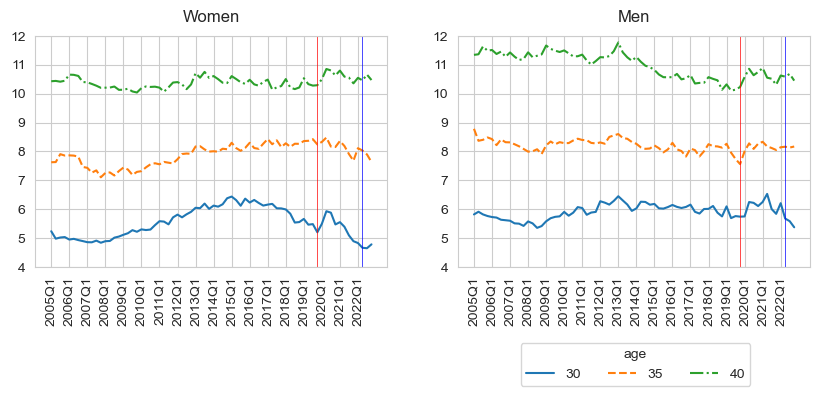

In [78]:
markers = ['o','^','*','s']
lines = ['-','--',"-."]

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title('Women', y= 1.025)
for i,age in enumerate([30,35,40]):
    data_i = data_all_moms[age][10][['ten_y','ciclo']]
    data_i = data_i.groupby('ciclo')['ten_y'].aggregate(np.mean)
    plt.plot(data_i.index.map(date_dict),data_i,ms=3,ls=lines[i],label=age)

plt.xticks(data_i.index.map(date_dict)[::4],rotation=90)
plt.axvline('2022Q2',c='b',lw=0.5)
plt.axvline('2019Q4',c='r',lw=0.5)
plt.ylim(4,12)

plt.subplot(122)
plt.title('Men', y= 1.025)
for i,age in enumerate([30,35,40]):
    data_i = data_all_dads[age][10][['ten_y','ciclo']]
    data_i = data_i.groupby('ciclo')['ten_y'].aggregate(np.mean)
    plt.plot(data_i.index.map(date_dict),data_i,ms=3,ls=lines[i],label=age)
plt.ylim(4,12)
plt.xticks(data_i.index.map(date_dict)[::4],rotation=90)
plt.legend(ncols=3,bbox_to_anchor=(0.85,-0.3),title='age')
plt.axvline('2022Q2',c='b',lw=0.5)
plt.axvline('2019Q4',c='r',lw=0.5)
plt.show()

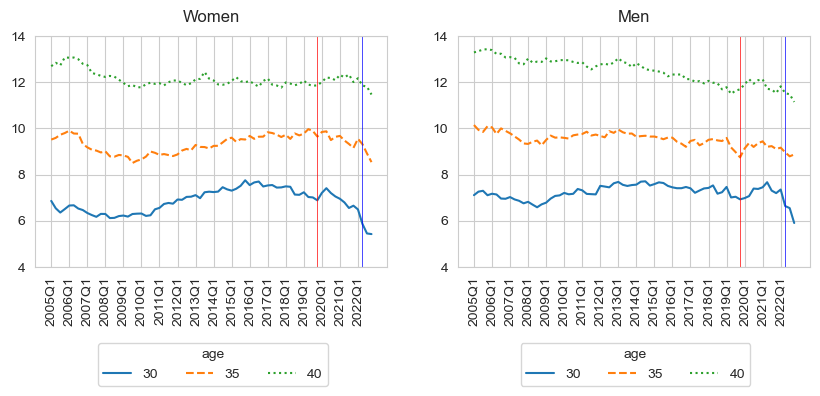

In [75]:
markers = ['o','^','*','s']
lines = ['-','--',':',"-."]

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title('Women', y= 1.025)
for i,age in enumerate([30,35,40]):
    data_i = data_all_moms_p[age][10][['ten_y','ciclo']]
    data_i = data_i.groupby('ciclo')['ten_y'].aggregate(np.mean)
    plt.plot(data_i.index.map(date_dict),data_i,ms=3,ls=lines[i],label=age)
plt.legend(ncols=3,bbox_to_anchor=(0.85,-0.3),title='age')
plt.xticks(data_i.index.map(date_dict)[::4],rotation=90)
plt.ylim(4,14)
plt.axvline('2022Q2',c='b',lw=0.5)
plt.axvline('2019Q4',c='r',lw=0.5)

plt.subplot(122)
plt.title('Men', y= 1.025)
for i,age in enumerate([30,35,40]):
    data_i = data_all_dads_p[age][10][['ten_y','ciclo']]
    data_i = data_i.groupby('ciclo')['ten_y'].aggregate(np.mean)
    plt.plot(data_i.index.map(date_dict),data_i,ms=3,ls=lines[i],label=age)
plt.ylim(4,14)
plt.legend(ncols=3,bbox_to_anchor=(0.85,-0.3),title='age')
plt.axvline('2019Q4',c='r',lw=0.5)
plt.axvline('2022Q2',c='b',lw=0.5)
plt.xticks(data_i.index.map(date_dict)[::4],rotation=90)
plt.show()

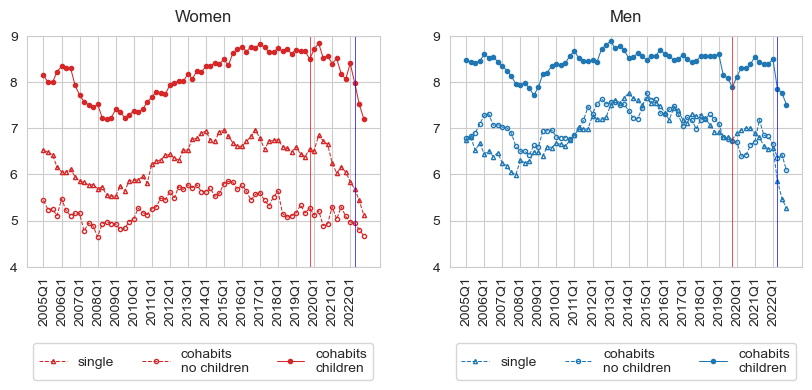

In [38]:
markers = ['^','o','o','s']
lines = ['--',"--",'-']
labels = ['single','cohabits\nno children', 'cohabits\nchildren']
fs = ['none','none','full']
colors = sn.color_palette()
ccs = data_all_moms_p[30][-1]['ciclo'].unique()
T = ccs.size



plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title('Women', y= 1.025)
for i,age in enumerate([-1,0,15]):
    data_i = pd.concat((data_all_moms_p[30][age][['ten_y','ciclo','facexp']],
                        data_all_moms_p[35][age][['ten_y','ciclo','facexp']]))
    weighted_av_ten = np.zeros(T)
    for j,cc in enumerate(ccs):
        data_j = data_i[data_i['ciclo']==cc].copy()
        data_j = data_j.dropna()
        weighted_av_ten[j] = np.average(data_j['ten_y'],weights=data_j['facexp'])
    data_i = data_i.groupby('ciclo')['ten_y'].aggregate(np.mean)
    plt.plot(data_i.index.map(date_dict),weighted_av_ten,ms=3,lw=0.75,
             ls=lines[i],label=labels[i],color=colors[3],marker=markers[i],fillstyle=fs[i])
plt.legend(ncols=3,bbox_to_anchor=(1,-0.3))
plt.xticks(data_i.index.map(date_dict)[::4],rotation=90)
plt.ylim(4,9)
plt.axvline('2022Q2',c='b',lw=0.5)
plt.axvline('2019Q4',c='r',lw=0.5)

plt.subplot(122)
plt.title('Men', y= 1.025)
for i,age in enumerate([-1,0,15]):
    data_i = pd.concat((data_all_dads_p[30][age][['ten_y','ciclo','facexp']],
                        data_all_dads_p[35][age][['ten_y','ciclo','facexp']]))
    weighted_av_ten = np.zeros(T)
    for j,cc in enumerate(ccs):
        data_j = data_i[data_i['ciclo']==cc].copy()
        data_j = data_j.dropna()
        weighted_av_ten[j] = np.average(data_j['ten_y'],weights=data_j['facexp'])
    data_i = data_i.groupby('ciclo')['ten_y'].aggregate(np.mean)
    plt.plot(data_i.index.map(date_dict),weighted_av_ten,ms=3,lw=0.75,
             ls=lines[i],label=labels[i],color=colors[0],marker=markers[i],fillstyle=fs[i])
plt.ylim(4,9)
plt.legend(ncols=3,bbox_to_anchor=(1,-0.3))
plt.axvline('2019Q4',c='r',lw=0.5)
plt.axvline('2022Q2',c='b',lw=0.5)
plt.xticks(data_i.index.map(date_dict)[::4],rotation=90)
plt.savefig(path+'average_tenure_groups_p.pdf',format='pdf',bbox_inches='tight')
plt.show()

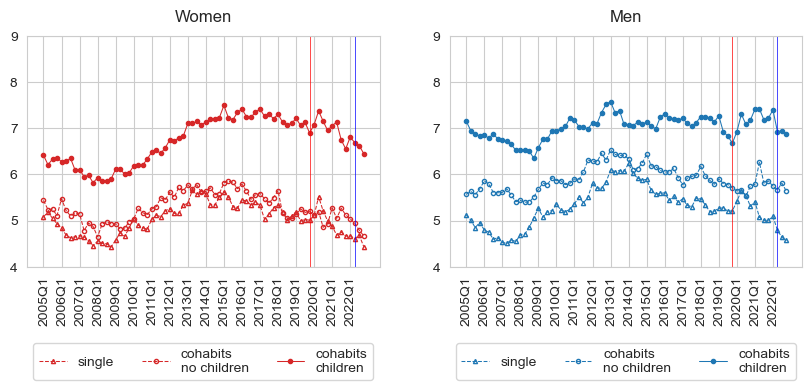

In [37]:
markers = ['^','o','o','s']
lines = ['--',"--",'-']
labels = ['single','cohabits\nno children', 'cohabits\nchildren']
fs = ['none','none','full']
colors = sn.color_palette()
ccs = data_all_moms_p[30][-1]['ciclo'].unique()
T = ccs.size



plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title('Women', y= 1.025)
for i,age in enumerate([-1,0,15]):
    data_i = pd.concat((data_all_moms[30][age][['ten_y','ciclo','facexp']],
                        data_all_moms[35][age][['ten_y','ciclo','facexp']]))
    weighted_av_ten = np.zeros(T)
    for j,cc in enumerate(ccs):
        data_j = data_i[data_i['ciclo']==cc].copy()
        data_j = data_j.dropna()
        weighted_av_ten[j] = np.average(data_j['ten_y'],weights=data_j['facexp'])
    data_i = data_i.groupby('ciclo')['ten_y'].aggregate(np.mean)
    plt.plot(data_i.index.map(date_dict),weighted_av_ten,ms=3,lw=0.75,
             ls=lines[i],label=labels[i],color=colors[3],marker=markers[i],fillstyle=fs[i])
plt.legend(ncols=3,bbox_to_anchor=(1,-0.3))
plt.xticks(data_i.index.map(date_dict)[::4],rotation=90)
plt.ylim(4,9)
plt.axvline('2022Q2',c='b',lw=0.5)
plt.axvline('2019Q4',c='r',lw=0.5)

plt.subplot(122)
plt.title('Men', y= 1.025)
for i,age in enumerate([-1,0,15]):
    data_i = pd.concat((data_all_dads[30][age][['ten_y','ciclo','facexp']],
                        data_all_dads[35][age][['ten_y','ciclo','facexp']]))
    weighted_av_ten = np.zeros(T)
    for j,cc in enumerate(ccs):
        data_j = data_i[data_i['ciclo']==cc].copy()
        data_j = data_j.dropna()
        weighted_av_ten[j] = np.average(data_j['ten_y'],weights=data_j['facexp'])
    data_i = data_i.groupby('ciclo')['ten_y'].aggregate(np.mean)
    plt.plot(data_i.index.map(date_dict),weighted_av_ten,ms=3,lw=0.75,
             ls=lines[i],label=labels[i],color=colors[0],marker=markers[i],fillstyle=fs[i])
plt.ylim(4,9)
plt.legend(ncols=3,bbox_to_anchor=(1,-0.3))
plt.axvline('2019Q4',c='r',lw=0.5)
plt.axvline('2022Q2',c='b',lw=0.5)
plt.xticks(data_i.index.map(date_dict)[::4],rotation=90)
plt.savefig(path+'average_tenure_groups.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [6]:
mother_5_ten = ten_data[np.logical_and(ten_data['mother_5']==1,ten_data['wife']==1)]['ten_y'].copy()

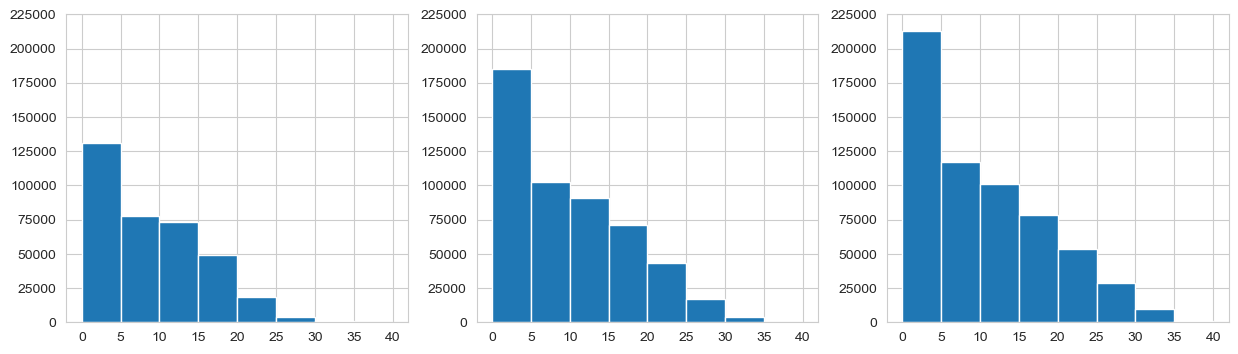

In [41]:
plt.figure(figsize=(15,4))
for i,kid_age in enumerate([5,10,15]):
    plt.subplot(131+i)
    data_slice = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)]['ten_y'].copy()
    plt.hist(data_slice.values,bins=np.arange(0,45,5))
    plt.ylim(0,225000)
    plt.xticks(np.arange(0,45,5))
plt.show()

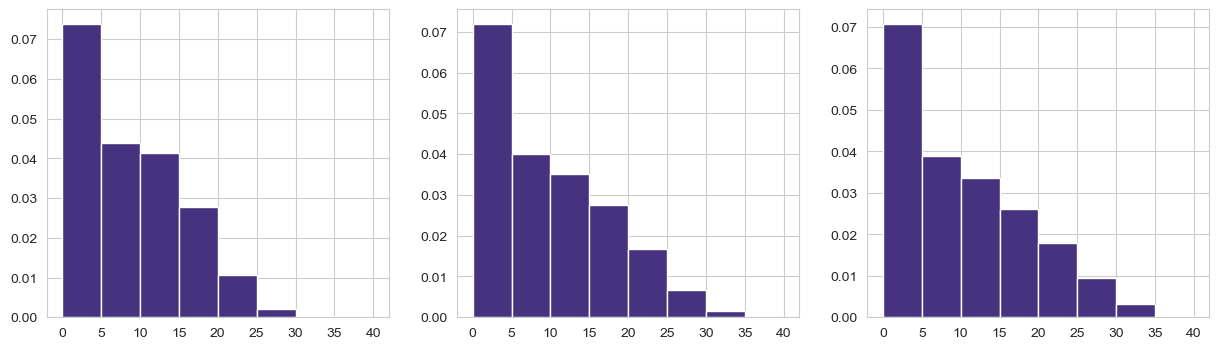

In [18]:
plt.figure(figsize=(15,4))
for i,kid_age in enumerate([5,10,15]):
    plt.subplot(131+i)
    data_slice = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)]['ten_y'].copy()
    plt.hist(data_slice.values,bins=np.arange(0,45,5),density=True)
#     plt.ylim(0,225000)
    plt.xticks(np.arange(0,45,5))
plt.show()

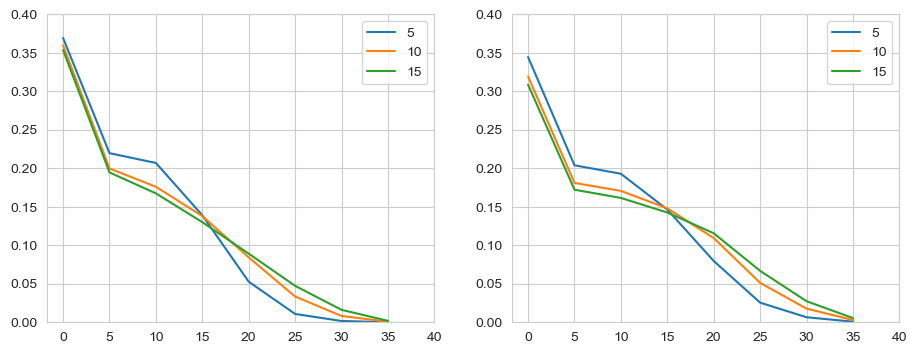

In [62]:
plt.figure(figsize=(11,4))
plt.subplot(121)
for i,kid_age in enumerate([5,10,15]):
    data_slice = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)]['ten_y'].copy()
    h, b = np.histogram(data_slice.values,bins=np.arange(0,45,5))
    plt.plot(b[:-1],h/np.sum(h),label=kid_age)
    plt.ylim(0,0.4)
plt.xticks(np.arange(0,45,5))
plt.legend()

plt.subplot(122)
for i,kid_age in enumerate([5,10,15]):
    data_slice = ten_data[np.logical_and(ten_data['father_{}'.format(kid_age)]==1,ten_data['husband']==1)]['ten_y'].copy()
    h, b = np.histogram(data_slice.values,bins=np.arange(0,45,5))
    plt.plot(b[:-1],h/np.sum(h),label=kid_age)
    plt.ylim(0,0.4)
plt.xticks(np.arange(0,45,5))
plt.legend()

plt.show()

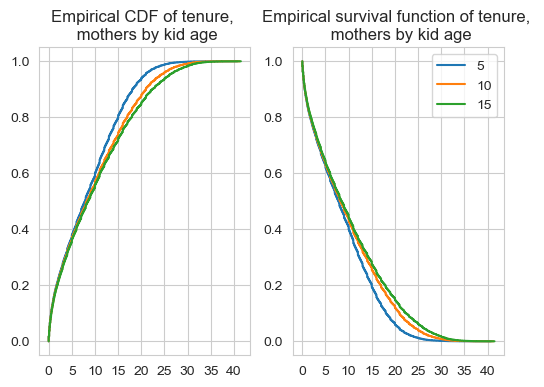

In [9]:
plt.figure(figsize=(6,4))
for i,kid_age in enumerate([5,10,15]):
    data_slice = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)]['ten_y'].copy()
    x = np.sort(data_slice)
    y = np.arange(len(x))/float(len(x))
    plt.subplot(121)
    plt.title('Empirical CDF of tenure, \n mothers by kid age')
    plt.plot(x, y,label=kid_age)
#     plt.ylim(0,225000)
    plt.xticks(np.arange(0,45,5))
    plt.subplot(122)
    plt.title('Empirical survival function of tenure, \n mothers by kid age')
    plt.plot(x, 1-y,label=kid_age)
#     plt.ylim(0,225000)
    plt.xticks(np.arange(0,45,5))
plt.legend()
plt.show()

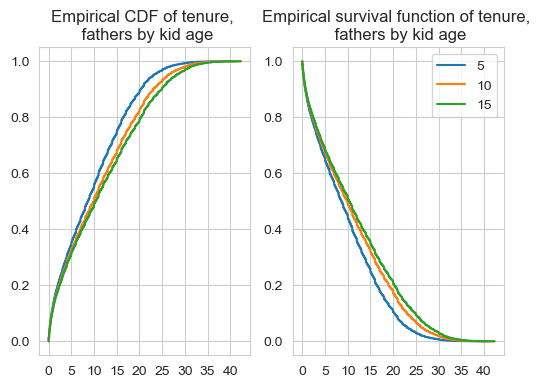

In [10]:
plt.figure(figsize=(6,4))
for i,kid_age in enumerate([5,10,15]):
    data_slice = ten_data[np.logical_and(ten_data['father_{}'.format(kid_age)]==1,ten_data['husband']==1)]['ten_y'].copy()
    x = np.sort(data_slice)
    y = np.arange(len(x))/float(len(x))
    plt.subplot(121)
    plt.title('Empirical CDF of tenure, \n fathers by kid age')
    plt.plot(x, y,label=kid_age)
#     plt.ylim(0,225000)
    plt.xticks(np.arange(0,45,5))
    plt.subplot(122)
    plt.title('Empirical survival function of tenure, \n fathers by kid age')
    plt.plot(x, 1-y,label=kid_age)
#     plt.ylim(0,225000)
    plt.xticks(np.arange(0,45,5))
plt.legend()
plt.show()

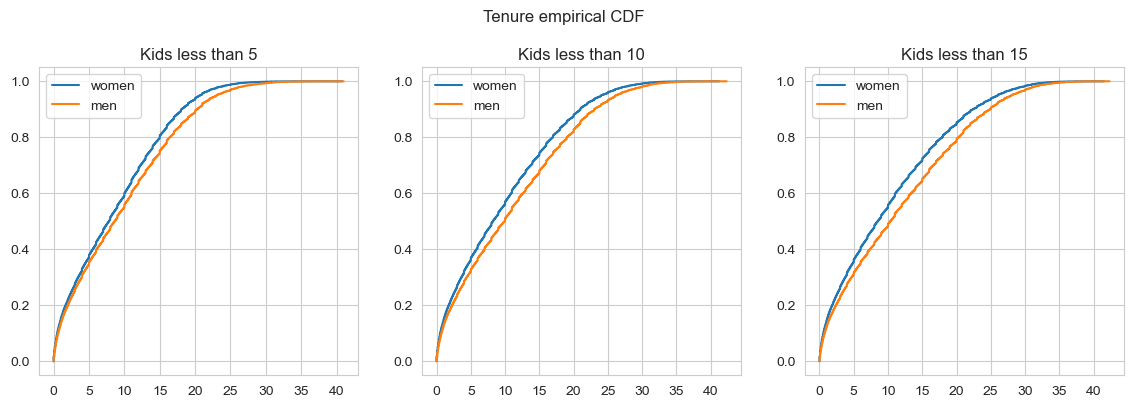

In [11]:
plt.figure(figsize=(14,4))
plt.suptitle('Tenure empirical CDF',y=1.025)
for i,kid_age in enumerate([5,10,15]):
    plt.subplot(131+i)
    plt.title('Kids less than {}'.format(kid_age))
    data_slice = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)]['ten_y'].copy()
    x = np.sort(data_slice)
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y,label='women')
    
    data_slice = ten_data[np.logical_and(ten_data['father_{}'.format(kid_age)]==1,ten_data['husband']==1)]['ten_y'].copy()
    x = np.sort(data_slice)
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y,label='men')
    plt.xticks(np.arange(0,45,5))
    plt.legend()
plt.show()

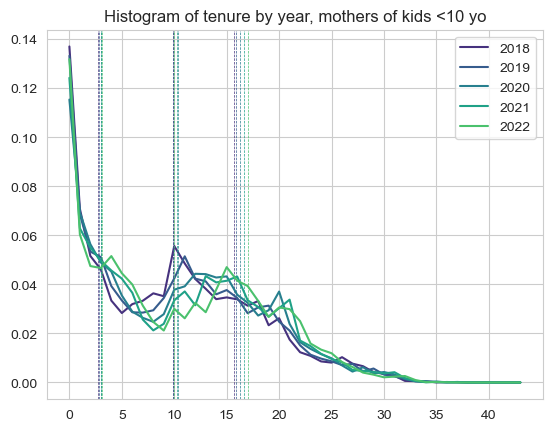

In [12]:
kid_age = 10
cs = sn.color_palette('viridis')
sn.set_palette(cs)
data_mothers = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)].copy()
for i,year in enumerate(years_range[-5:]):
    dta = data_mothers[data_mothers['yd']==year]['ten_y'].copy()
    h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
    plt.plot(b[:-1],h/np.sum(h),label=year)
    plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
    plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
    plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
plt.legend()
plt.title('Histogram of tenure by year, mothers of kids <{} yo'.format(kid_age))
plt.xticks(np.arange(0,45,5))
plt.show()

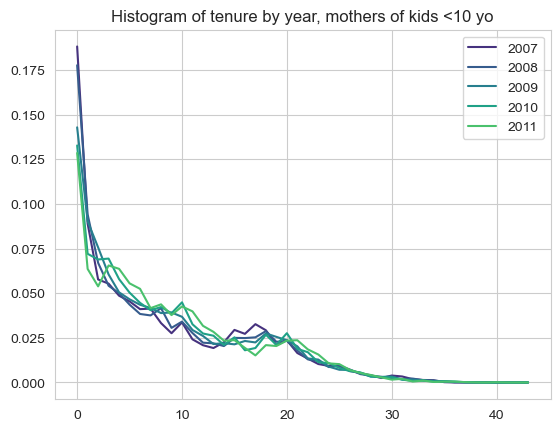

In [13]:
kid_age = 10
sn.set_palette('viridis')
data_mothers = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)].copy()
for year in years_range[2:7]:
    dta = data_mothers[data_mothers['yd']==year]['ten_y'].copy()
    h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
    plt.plot(b[:-1],h/np.sum(h),label=year)
    plt.title('Histogram of tenure by year, mothers of kids <{} yo'.format(kid_age))
plt.legend()
plt.show()

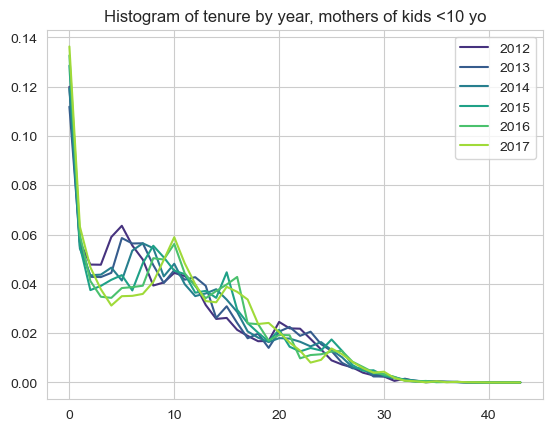

In [14]:
kid_age = 10
sn.set_palette('viridis')
data_mothers = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)].copy()
for year in years_range[7:-5]:
    dta = data_mothers[data_mothers['yd']==year]['ten_y'].copy()
    h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
    plt.plot(b[:-1],h/np.sum(h),label=year)
    plt.title('Histogram of tenure by year, mothers of kids <{} yo'.format(kid_age))
plt.legend()
plt.show()

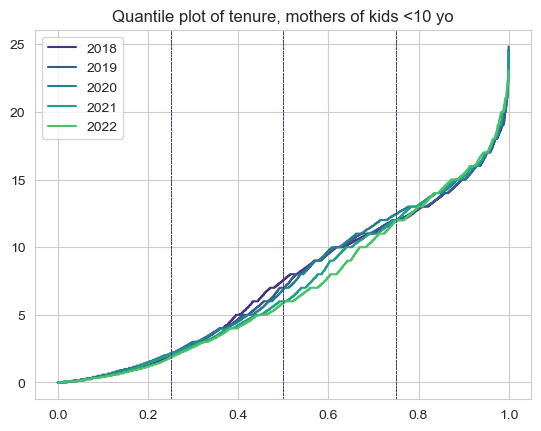

In [16]:
kid_age = 10
sn.set_palette('viridis')
data_mothers = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)].copy()
for year in years_range[-5:]:
    dta = data_mothers[np.logical_and(data_mothers['yd']==year,
                                      np.logical_and(data_mothers['edad5']>=30,data_mothers['edad5']<=35))]['ten_y'].copy()
    x = np.sort(dta)
    y = np.arange(len(x))/float(len(x))
    plt.plot(y,x,label=year)
    plt.axvline(0.25,lw=0.5,ls='--')
    plt.axvline(0.5,lw=0.5,ls='--')
    plt.axvline(0.75,lw=0.5,ls='--')
    plt.title('Quantile plot of tenure, mothers of kids <{} yo'.format(kid_age))
plt.legend()
plt.show()

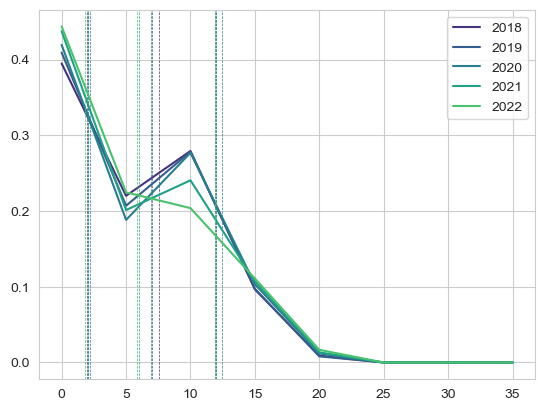

In [106]:
kid_age = 10
cs = sn.color_palette('viridis')
sn.set_palette(cs)
sn.set_palette('viridis')
data_mothers = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)].copy()
for i,year in enumerate(years_range[-5:]):
    dta = data_mothers[np.logical_and(data_mothers['yd']==year,
                                      np.logical_and(data_mothers['edad5']>=30,data_mothers['edad5']<=35))]['ten_y'].copy()
    h, b = np.histogram(dta.values,bins=np.arange(0,45,5))
    plt.plot(b[:-1],h/np.sum(h),label=year)
    plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
    plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
    plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
plt.legend()
plt.show()

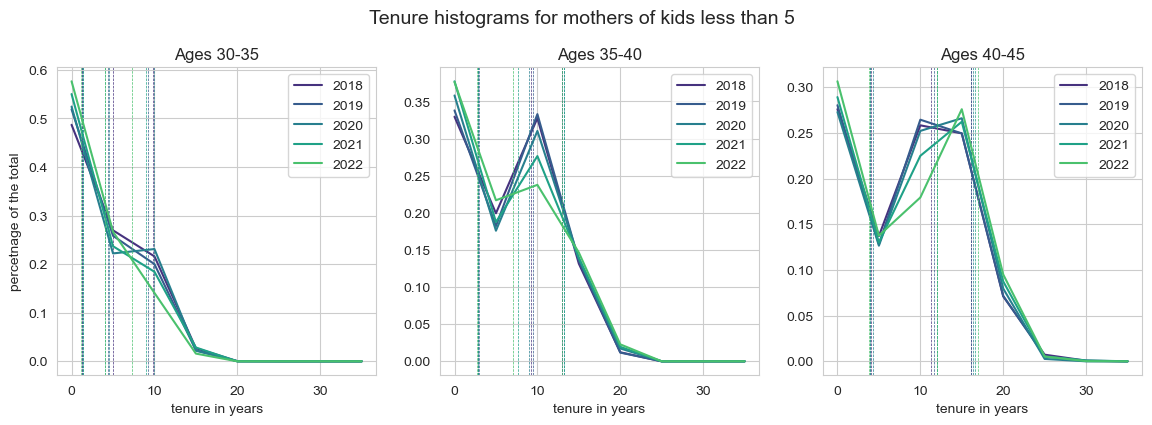

In [19]:
kid_age = 5
cs = sn.color_palette('viridis')
sn.set_palette(cs)

plt.figure(figsize=(14,4))
plt.suptitle('Tenure histograms for mothers of kids less than {}'.format(kid_age),y=1.025,fontsize=14)
data_mothers = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)].copy()
for j,age in enumerate([30,35,40]):
    plt.subplot(131+j)
    plt.title('Ages {}-{}'.format(age,age+5))
    for i,year in enumerate(years_range[-5:]):
        dta = data_mothers[np.logical_and(data_mothers['yd']==year,
                                          np.logical_and(data_mothers['edad5']>=age,
                                                         data_mothers['edad5']<age+5))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,5))
        plt.plot(b[:-1],h/np.sum(h),label=year)
        plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
    plt.legend()
    plt.xlabel('tenure in years')
    if j==0:
        plt.ylabel('percetnage of the total')
plt.show()

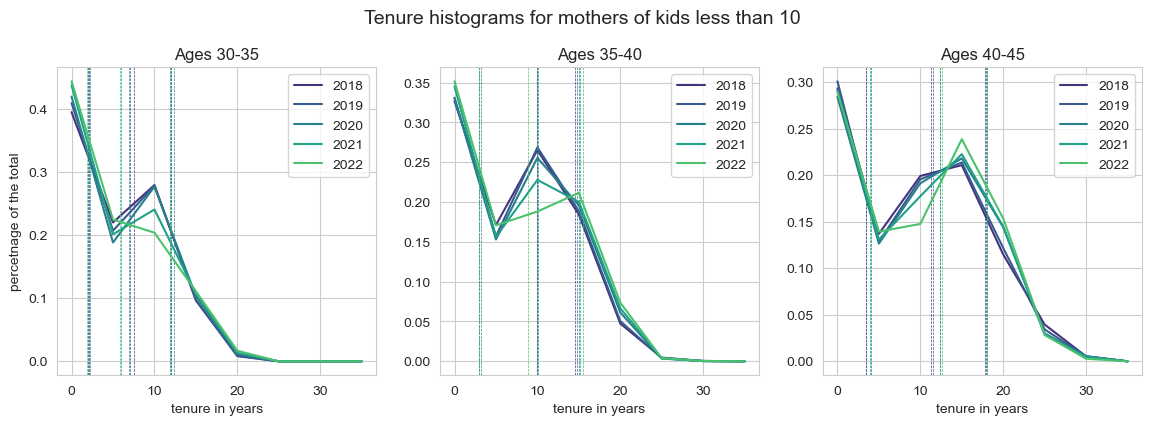

In [116]:
kid_age = 10
cs = sn.color_palette('viridis')
sn.set_palette(cs)

plt.figure(figsize=(14,4))
plt.suptitle('Tenure histograms for mothers of kids less than {}'.format(kid_age),y=1.025,fontsize=14)
data_mothers = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)].copy()
for j,age in enumerate([30,35,40]):
    plt.subplot(131+j)
    plt.title('Ages {}-{}'.format(age,age+5))
    for i,year in enumerate(years_range[-5:]):
        dta = data_mothers[np.logical_and(data_mothers['yd']==year,
                                          np.logical_and(data_mothers['edad5']>=age,
                                                         data_mothers['edad5']<age+10))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,5))
        plt.plot(b[:-1],h/np.sum(h),label=year)
        plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
    plt.legend()
    plt.xlabel('tenure in years')
    if j==0:
        plt.ylabel('percetnage of the total')
plt.show()

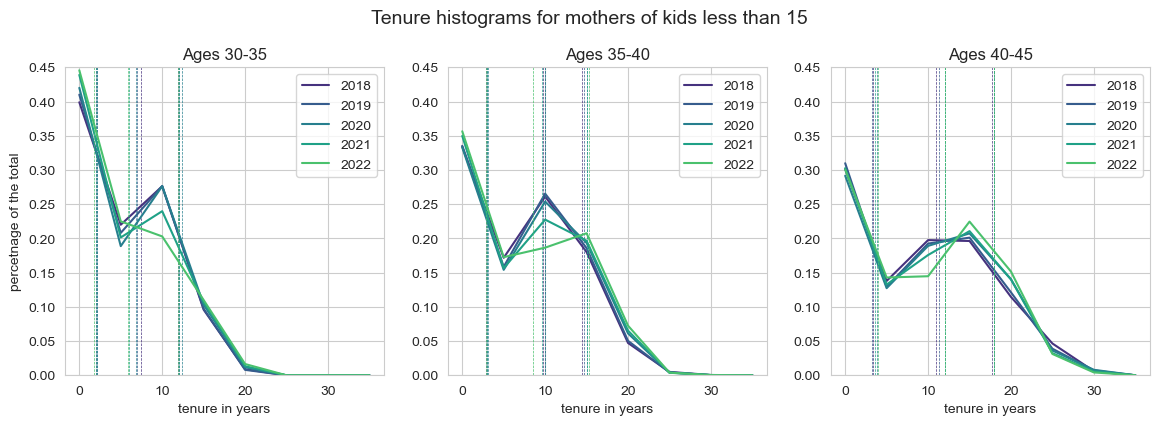

In [123]:
kid_age = 15
cs = sn.color_palette('viridis')
sn.set_palette(cs)

plt.figure(figsize=(14,4))
plt.suptitle('Tenure histograms for mothers of kids less than {}'.format(kid_age),y=1.025,fontsize=14)
data_mothers = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)].copy()
for j,age in enumerate([30,35,40]):
    plt.subplot(131+j)
    plt.title('Ages {}-{}'.format(age,age+5))
    for i,year in enumerate(years_range[-5:]):
        dta = data_mothers[np.logical_and(data_mothers['yd']==year,
                                          np.logical_and(data_mothers['edad5']>=age,
                                                         data_mothers['edad5']<age+10))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,5))
        plt.plot(b[:-1],h/np.sum(h),label=year)
        plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
    plt.ylim(0,0.45)
    plt.legend()
    plt.xlabel('tenure in years')
    if j==0:
        plt.ylabel('percetnage of the total')
plt.show()

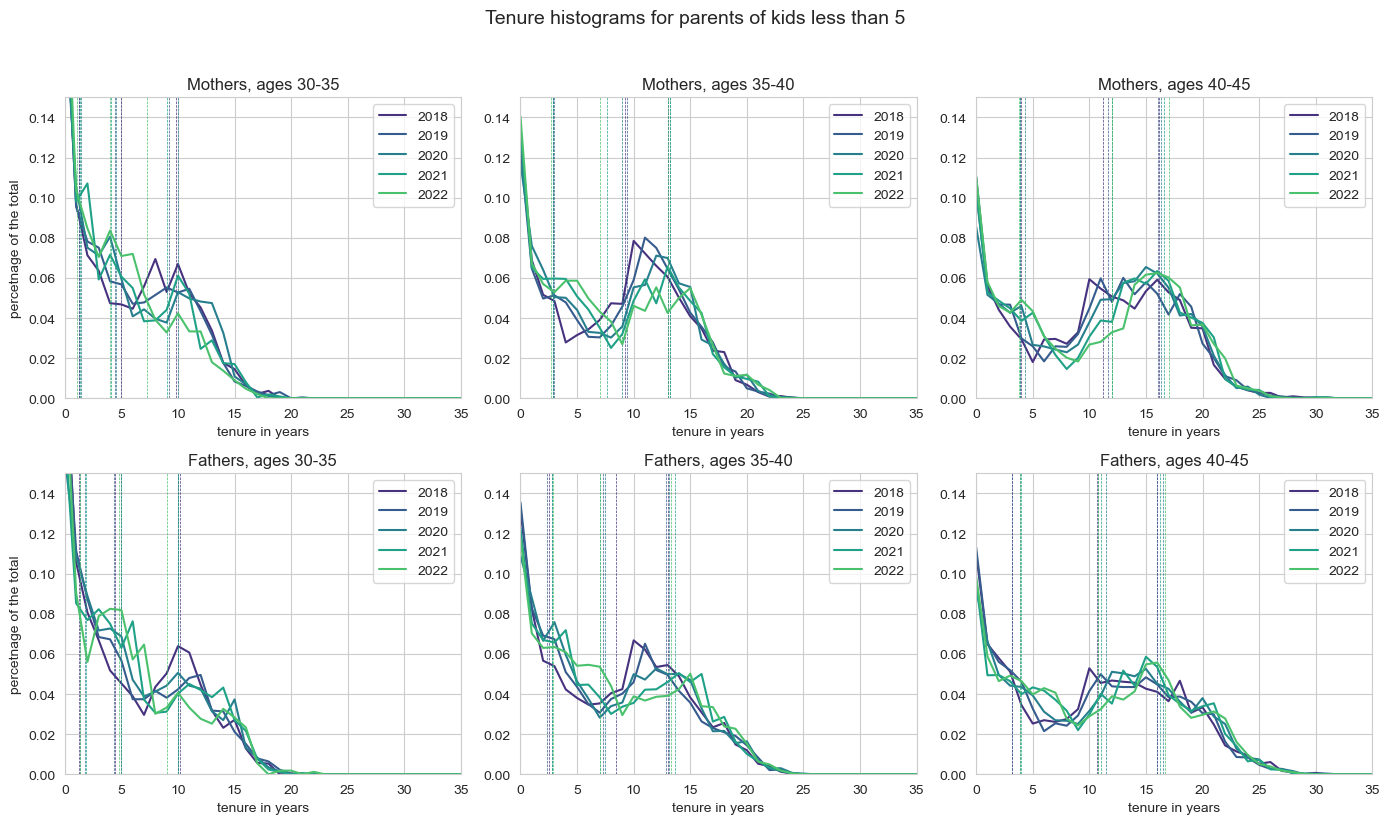

In [20]:
kid_age = 5
cs = sn.color_palette('viridis')
sn.set_palette(cs)

plt.figure(figsize=(14,8))
plt.suptitle('Tenure histograms for parents of kids less than {}'.format(kid_age),y=1.025,fontsize=14)
data_fathers = ten_data[np.logical_and(ten_data['father_{}'.format(kid_age)]==1,ten_data['husband']==1)].copy()
data_mothers = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)].copy()
for j,age in enumerate([30,35,40]):
    plt.subplot(231+j)
    plt.title('Mothers, ages {}-{}'.format(age,age+5))
    for i,year in enumerate(years_range[-5:]):
        dta = data_mothers[np.logical_and(data_mothers['yd']==year,
                                          np.logical_and(data_mothers['edad5']>=age,
                                                         data_mothers['edad5']<age+5))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        plt.plot(b[:-1],h/np.sum(h),label=year)
        plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
    plt.ylim(0,0.15)
    plt.legend()
    plt.xlabel('tenure in years')
    if j==0:
        plt.ylabel('percetnage of the total')
    plt.xlim(0,35)
for j,age in enumerate([30,35,40]):
    plt.subplot(234+j)
    plt.title('Fathers, ages {}-{}'.format(age,age+5))
    for i,year in enumerate(years_range[-5:]):
        dta = data_fathers[np.logical_and(data_fathers['yd']==year,
                                          np.logical_and(data_fathers['edad5']>=age,
                                                         data_fathers['edad5']<age+5))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        plt.plot(b[:-1],h/np.sum(h),label=year)
        plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
    plt.ylim(0,0.15)
    plt.xlim(0,35)
    plt.legend()
    plt.xlabel('tenure in years')
    if j==0:
        plt.ylabel('percetnage of the total')
plt.tight_layout()
plt.show()

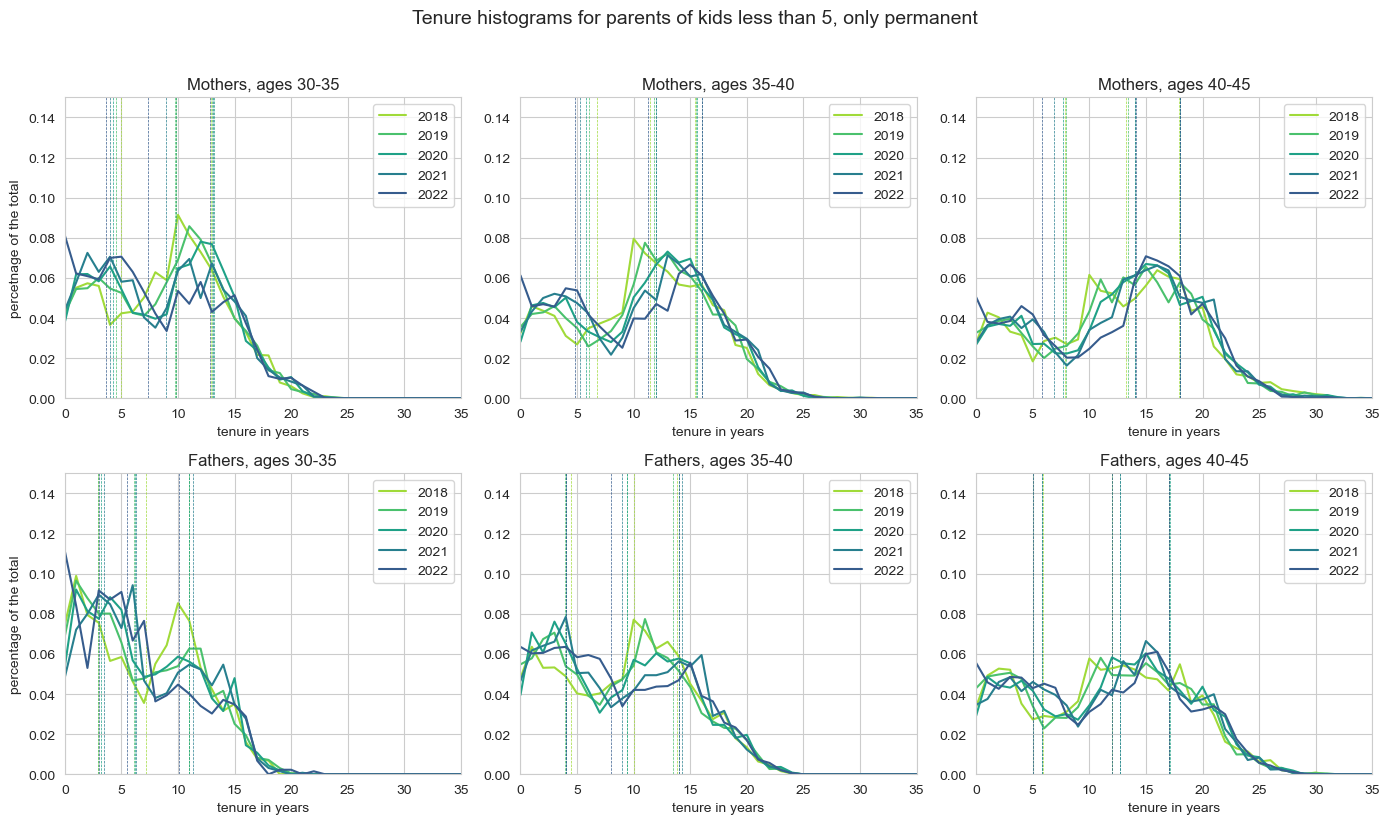

In [140]:
kid_age = 5
cs = sn.color_palette('viridis_r',)
sn.set_palette(cs)

plt.figure(figsize=(14,8))
plt.suptitle('Tenure histograms for parents of kids less than {}, only permanent'.format(kid_age),y=1.025,fontsize=14)
data_fathers = ten_data[np.logical_and(ten_data['father_{}'.format(kid_age)]==1,ten_data['husband']==1)].copy()
data_mothers = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)].copy()
for j,age in enumerate([30,35,40]):
    plt.subplot(231+j)
    plt.title('Mothers, ages {}-{}'.format(age,age+5))
    for i,year in enumerate(years_range[-5:]):
        dta = data_mothers[np.logical_and(data_mothers['yd']==year,np.logical_and(data_mothers['state']=='P',
                                          np.logical_and(data_mothers['edad5']>=age,
                                                         data_mothers['edad5']<age+10)))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        plt.plot(b[:-1],h/np.sum(h),label=year)
        plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
    plt.ylim(0,0.15)
    plt.legend()
    plt.xlabel('tenure in years')
    if j==0:
        plt.ylabel('percetnage of the total')
    plt.xlim(0,35)
for j,age in enumerate([30,35,40]):
    plt.subplot(234+j)
    plt.title('Fathers, ages {}-{}'.format(age,age+5))
    for i,year in enumerate(years_range[-5:]):
        dta = data_fathers[np.logical_and(data_fathers['yd']==year,np.logical_and(data_fathers['state']=='P',
                                          np.logical_and(data_fathers['edad5']>=age,
                                                         data_fathers['edad5']<age+5)))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        plt.plot(b[:-1],h/np.sum(h),label=year)
        plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
    plt.ylim(0,0.15)
    plt.xlim(0,35)
    plt.legend()
    plt.xlabel('tenure in years')
    if j==0:
        plt.ylabel('percentage of the total')
plt.tight_layout()
plt.show()

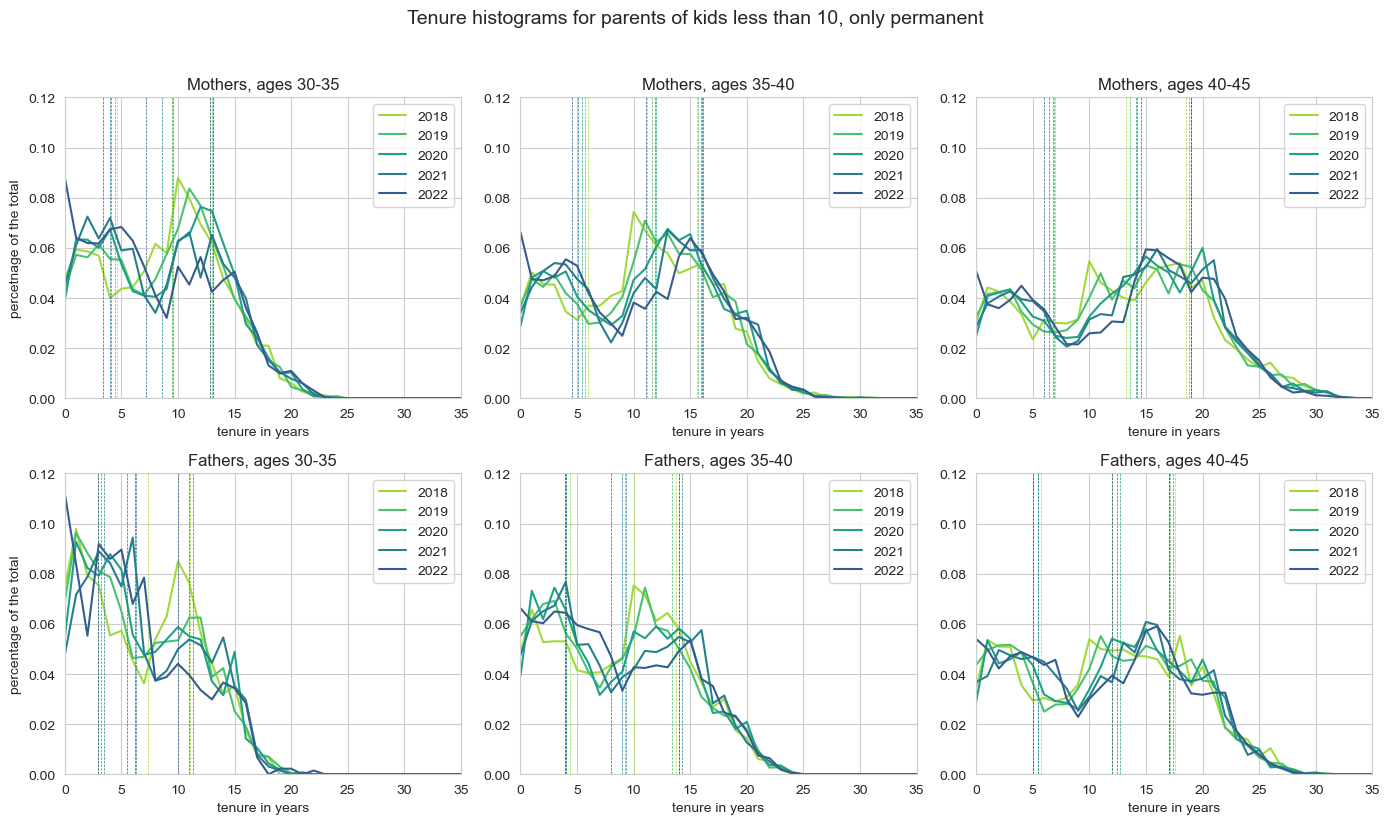

In [142]:
kid_age = 10
cs = sn.color_palette('viridis_r',)
sn.set_palette(cs)

plt.figure(figsize=(14,8))
plt.suptitle('Tenure histograms for parents of kids less than {}, only permanent'.format(kid_age),y=1.025,fontsize=14)
data_fathers = ten_data[np.logical_and(ten_data['father_{}'.format(kid_age)]==1,ten_data['husband']==1)].copy()
data_mothers = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)].copy()
for j,age in enumerate([30,35,40]):
    plt.subplot(231+j)
    plt.title('Mothers, ages {}-{}'.format(age,age+5))
    for i,year in enumerate(years_range[-5:]):
        dta = data_mothers[np.logical_and(data_mothers['yd']==year,np.logical_and(data_mothers['state']=='P',
                                          np.logical_and(data_mothers['edad5']>=age,
                                                         data_mothers['edad5']<age+10)))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        plt.plot(b[:-1],h/np.sum(h),label=year)
        plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
    plt.ylim(0,0.12)
    plt.legend()
    plt.xlabel('tenure in years')
    if j==0:
        plt.ylabel('percetnage of the total')
    plt.xlim(0,35)
for j,age in enumerate([30,35,40]):
    plt.subplot(234+j)
    plt.title('Fathers, ages {}-{}'.format(age,age+5))
    for i,year in enumerate(years_range[-5:]):
        dta = data_fathers[np.logical_and(data_fathers['yd']==year,np.logical_and(data_fathers['state']=='P',
                                          np.logical_and(data_fathers['edad5']>=age,
                                                         data_fathers['edad5']<age+5)))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        plt.plot(b[:-1],h/np.sum(h),label=year)
        plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
    plt.ylim(0,0.12)
    plt.xlim(0,35)
    plt.legend()
    plt.xlabel('tenure in years')
    if j==0:
        plt.ylabel('percentage of the total')
plt.tight_layout()
plt.show()

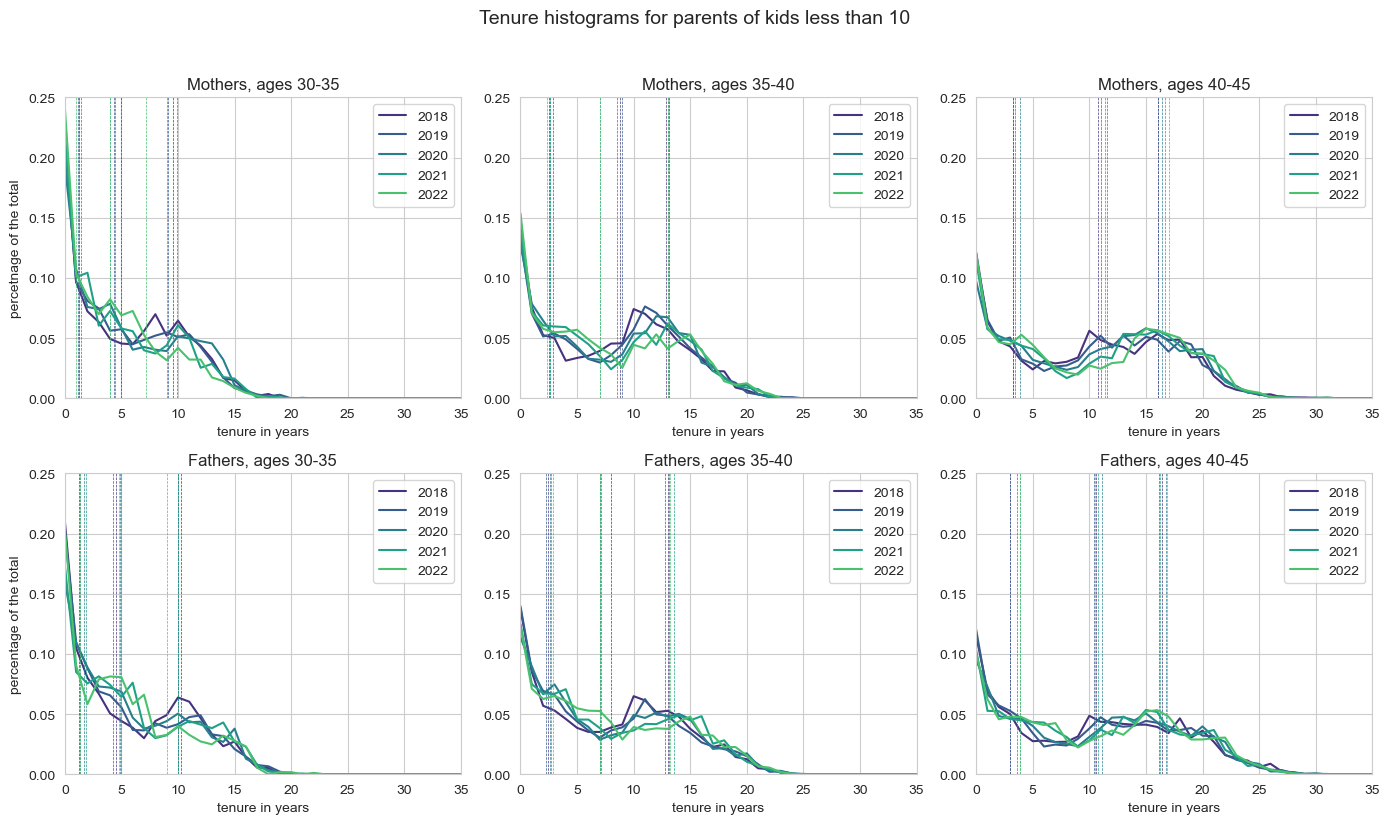

In [151]:
kid_age = 10
cs = sn.color_palette('viridis')
sn.set_palette(cs)

plt.figure(figsize=(14,8))
plt.suptitle('Tenure histograms for parents of kids less than {}'.format(kid_age),y=1.025,fontsize=14)
data_fathers = ten_data[np.logical_and(ten_data['father_{}'.format(kid_age)]==1,ten_data['husband']==1)].copy()
data_mothers = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)].copy()
for j,age in enumerate([30,35,40]):
    plt.subplot(231+j)
    plt.title('Mothers, ages {}-{}'.format(age,age+5))
    for i,year in enumerate(years_range[-5:]):
        dta = data_mothers[np.logical_and(data_mothers['yd']==year,
                                          np.logical_and(data_mothers['edad5']>=age,
                                                         data_mothers['edad5']<age+5))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        plt.plot(b[:-1],h/np.sum(h),label=year)
        plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
    plt.ylim(0,0.25)
    plt.xlim(0,35)
    plt.legend()
    plt.xlabel('tenure in years')
    if j==0:
        plt.ylabel('percetnage of the total')
for j,age in enumerate([30,35,40]):
    plt.subplot(234+j)
    plt.title('Fathers, ages {}-{}'.format(age,age+5))
    for i,year in enumerate(years_range[-5:]):
        dta = data_fathers[np.logical_and(data_fathers['yd']==year,
                                          np.logical_and(data_fathers['edad5']>=age,
                                                         data_fathers['edad5']<age+5))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        plt.plot(b[:-1],h/np.sum(h),label=year)
        plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
    plt.ylim(0,0.25)
    plt.xlim(0,35)
    plt.legend()
    plt.xlabel('tenure in years')
    if j==0:
        plt.ylabel('percentage of the total')
plt.tight_layout()
plt.show()

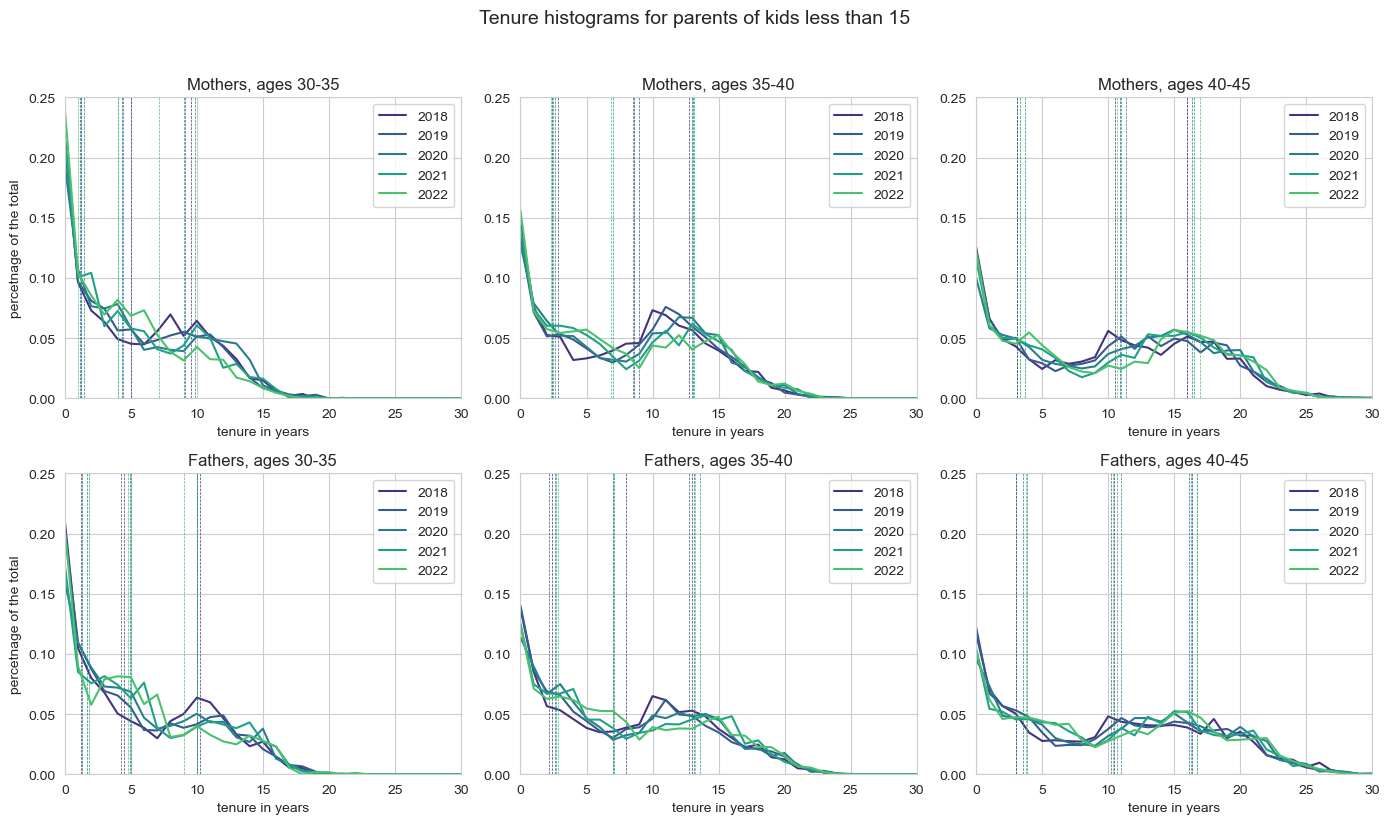

In [154]:
kid_age = 15
cs = sn.color_palette('viridis')
sn.set_palette(cs)

plt.figure(figsize=(14,8))
plt.suptitle('Tenure histograms for parents of kids less than {}'.format(kid_age),y=1.025,fontsize=14)
data_fathers = ten_data[np.logical_and(ten_data['father_{}'.format(kid_age)]==1,ten_data['husband']==1)].copy()
data_mothers = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)].copy()
for j,age in enumerate([30,35,40]):
    plt.subplot(231+j)
    plt.title('Mothers, ages {}-{}'.format(age,age+5))
    for i,year in enumerate(years_range[-5:]):
        dta = data_mothers[np.logical_and(data_mothers['yd']==year,
                                          np.logical_and(data_mothers['edad5']>=age,
                                                         data_mothers['edad5']<age+5))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        plt.plot(b[:-1],h/np.sum(h),label=year)
        plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
    plt.ylim(0,0.25)
    plt.xlim(0,30)
    plt.legend()
    plt.xlabel('tenure in years')
    if j==0:
        plt.ylabel('percetnage of the total')
for j,age in enumerate([30,35,40]):
    plt.subplot(234+j)
    plt.title('Fathers, ages {}-{}'.format(age,age+5))
    for i,year in enumerate(years_range[-5:]):
        dta = data_fathers[np.logical_and(data_fathers['yd']==year,
                                          np.logical_and(data_fathers['edad5']>=age,
                                                         data_fathers['edad5']<age+5))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        plt.plot(b[:-1],h/np.sum(h),label=year)
        plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
    plt.ylim(0,0.25)
    plt.xlim(0,30)
    plt.legend()
    plt.xlabel('tenure in years')
    if j==0:
        plt.ylabel('percetnage of the total')
plt.tight_layout()
plt.show()

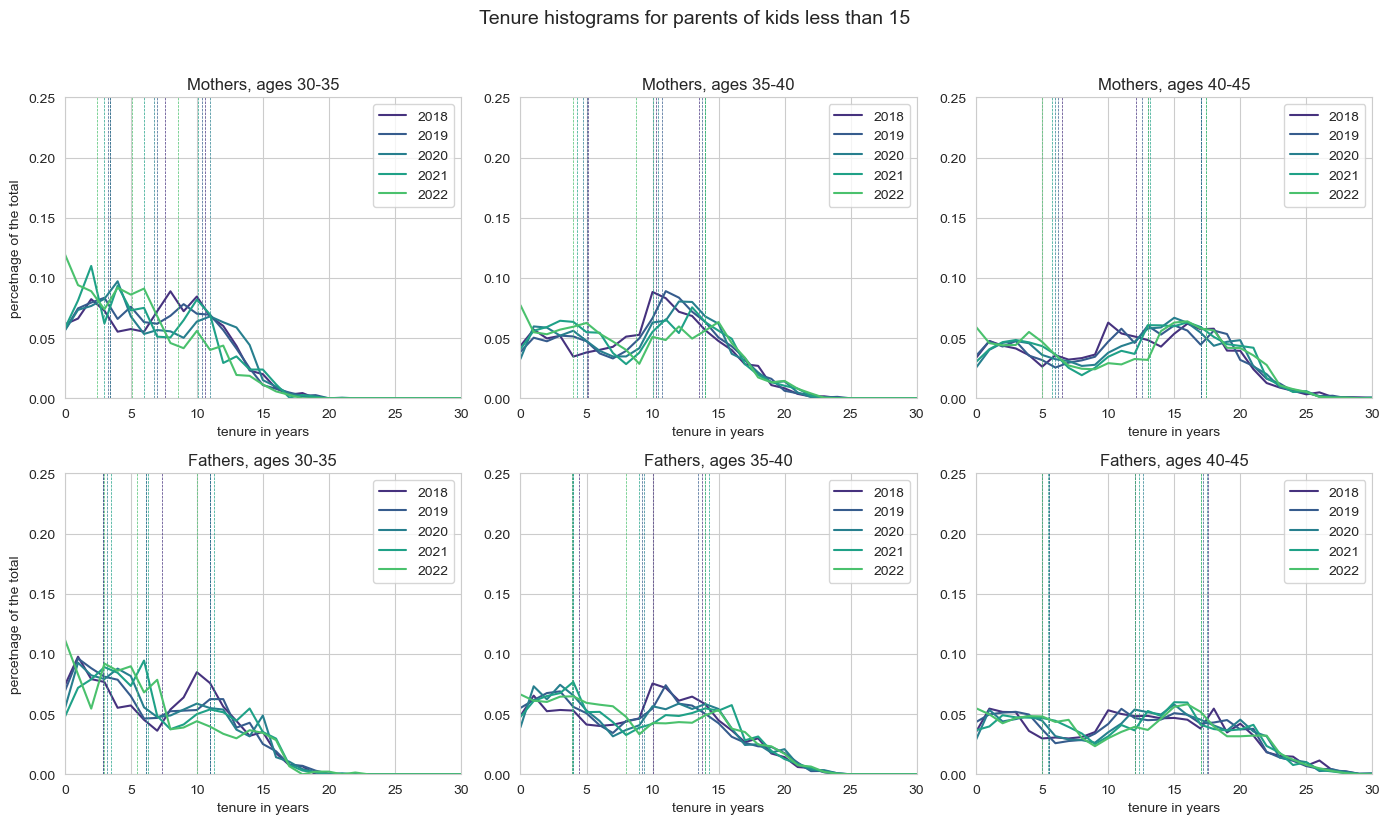

In [155]:
kid_age = 15
cs = sn.color_palette('viridis')
sn.set_palette(cs)

plt.figure(figsize=(14,8))
plt.suptitle('Tenure histograms for parents of kids less than {}'.format(kid_age),y=1.025,fontsize=14)
data_fathers = ten_data[np.logical_and(ten_data['father_{}'.format(kid_age)]==1,ten_data['husband']==1)].copy()
data_mothers = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)].copy()
for j,age in enumerate([30,35,40]):
    plt.subplot(231+j)
    plt.title('Mothers, ages {}-{}'.format(age,age+5))
    for i,year in enumerate(years_range[-5:]):
        dta = data_mothers[np.logical_and(data_mothers['yd']==year,np.logical_and(data_mothers['state']=='P',
                                          np.logical_and(data_mothers['edad5']>=age,
                                                         data_mothers['edad5']<age+5)))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        plt.plot(b[:-1],h/np.sum(h),label=year)
        plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
    plt.ylim(0,0.25)
    plt.xlim(0,30)
    plt.legend()
    plt.xlabel('tenure in years')
    if j==0:
        plt.ylabel('percetnage of the total')
for j,age in enumerate([30,35,40]):
    plt.subplot(234+j)
    plt.title('Fathers, ages {}-{}'.format(age,age+5))
    for i,year in enumerate(years_range[-5:]):
        dta = data_fathers[np.logical_and(data_fathers['yd']==year,np.logical_and(data_fathers['state']=='P',
                                          np.logical_and(data_fathers['edad5']>=age,
                                                         data_fathers['edad5']<age+5)))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        plt.plot(b[:-1],h/np.sum(h),label=year)
        plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
    plt.ylim(0,0.25)
    plt.xlim(0,30)
    plt.legend()
    plt.xlabel('tenure in years')
    if j==0:
        plt.ylabel('percentage of the total')
plt.tight_layout()
plt.show()

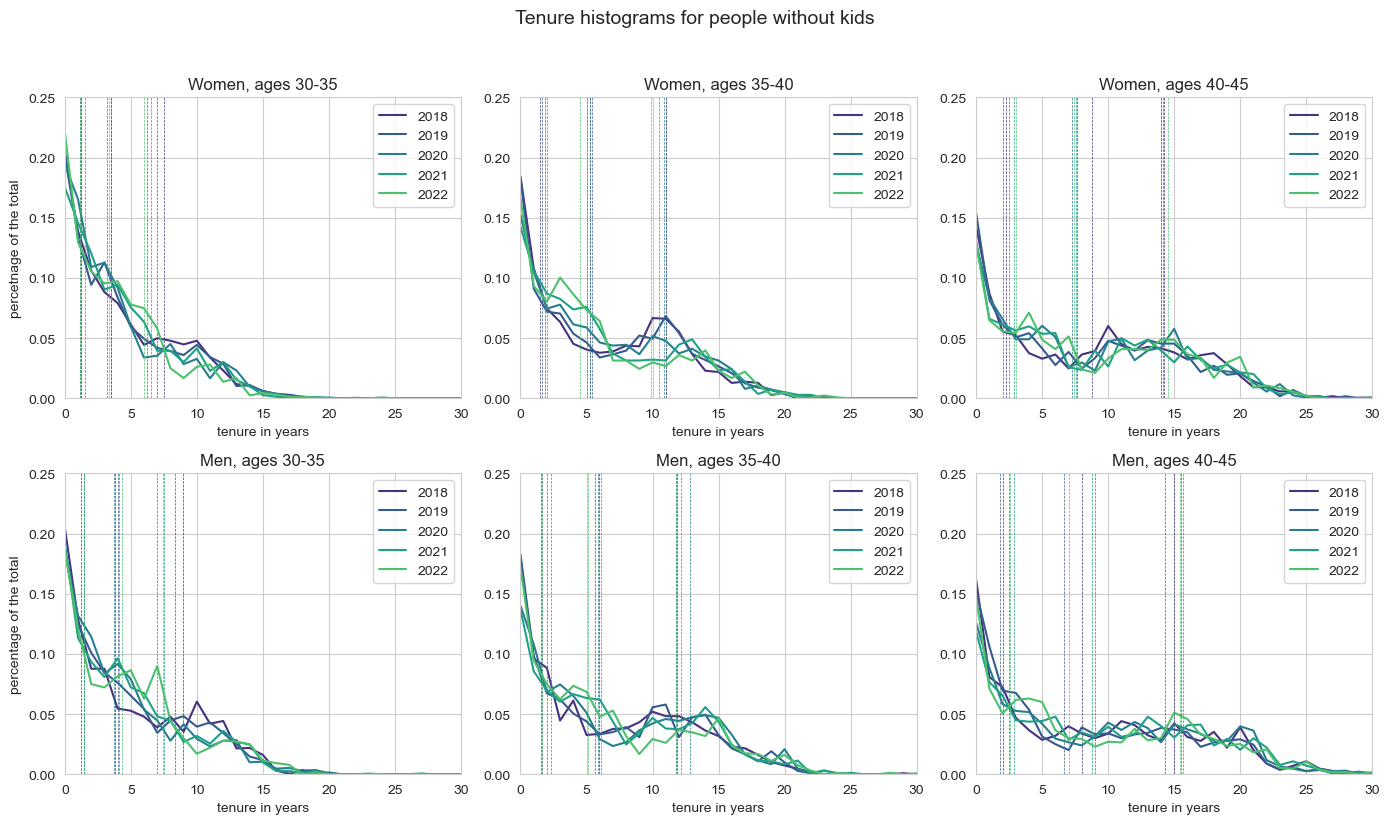

In [159]:
cs = sn.color_palette('viridis')
sn.set_palette(cs)

plt.figure(figsize=(14,8))
plt.suptitle('Tenure histograms for people without kids'.format(kid_age),y=1.025,fontsize=14)
data_fathers = ten_data[np.logical_and(ten_data['father_{}'.format(kid_age)]==0,ten_data['husband']==1)].copy()
data_mothers = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==0,ten_data['wife']==1)].copy()
for j,age in enumerate([30,35,40]):
    plt.subplot(231+j)
    plt.title('Women, ages {}-{}'.format(age,age+5))
    for i,year in enumerate(years_range[-5:]):
        dta = data_mothers[np.logical_and(data_mothers['yd']==year,
                                          np.logical_and(data_mothers['edad5']>=age,
                                                         data_mothers['edad5']<age+5))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        plt.plot(b[:-1],h/np.sum(h),label=year)
        plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
    plt.ylim(0,0.25)
    plt.xlim(0,30)
    plt.legend()
    plt.xlabel('tenure in years')
    if j==0:
        plt.ylabel('percetnage of the total')
for j,age in enumerate([30,35,40]):
    plt.subplot(234+j)
    plt.title('Men, ages {}-{}'.format(age,age+5))
    for i,year in enumerate(years_range[-5:]):
        dta = data_fathers[np.logical_and(data_fathers['yd']==year,
                                          np.logical_and(data_fathers['edad5']>=age,
                                                         data_fathers['edad5']<age+5))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        plt.plot(b[:-1],h/np.sum(h),label=year)
        plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
    plt.ylim(0,0.25)
    plt.xlim(0,30)
    plt.legend()
    plt.xlabel('tenure in years')
    if j==0:
        plt.ylabel('percentage of the total')
plt.tight_layout()
plt.show()

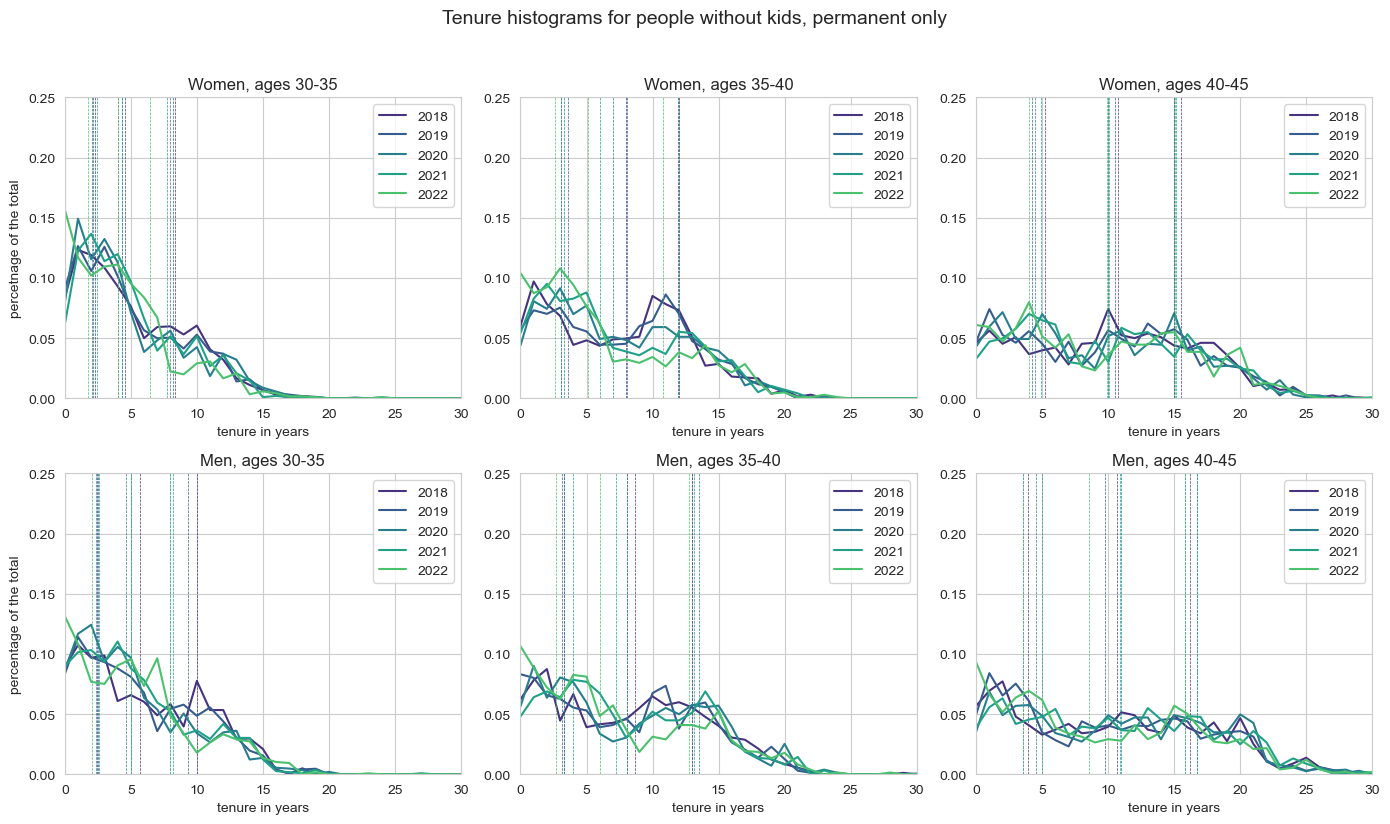

In [160]:
cs = sn.color_palette('viridis')
sn.set_palette(cs)

plt.figure(figsize=(14,8))
plt.suptitle('Tenure histograms for people without kids, permanent only'.format(kid_age),y=1.025,fontsize=14)
data_fathers = ten_data[np.logical_and(ten_data['father_{}'.format(kid_age)]==0,ten_data['husband']==1)].copy()
data_mothers = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==0,ten_data['wife']==1)].copy()
for j,age in enumerate([30,35,40]):
    plt.subplot(231+j)
    plt.title('Women, ages {}-{}'.format(age,age+5))
    for i,year in enumerate(years_range[-5:]):
        dta = data_mothers[np.logical_and(data_mothers['yd']==year,np.logical_and(data_mothers['state']=='P',
                                          np.logical_and(data_mothers['edad5']>=age,
                                                         data_mothers['edad5']<age+5)))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        plt.plot(b[:-1],h/np.sum(h),label=year)
        plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
    plt.ylim(0,0.25)
    plt.xlim(0,30)
    plt.legend()
    plt.xlabel('tenure in years')
    if j==0:
        plt.ylabel('percetnage of the total')
for j,age in enumerate([30,35,40]):
    plt.subplot(234+j)
    plt.title('Men, ages {}-{}'.format(age,age+5))
    for i,year in enumerate(years_range[-5:]):
        dta = data_fathers[np.logical_and(data_fathers['yd']==year,np.logical_and(data_fathers['state']=='P',
                                          np.logical_and(data_fathers['edad5']>=age,
                                                         data_fathers['edad5']<age+5)))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        plt.plot(b[:-1],h/np.sum(h),label=year)
        plt.axvline(dta.describe()['25%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['50%'],lw=0.5,ls='--',c=cs[i])
        plt.axvline(dta.describe()['75%'],lw=0.5,ls='--',c=cs[i])
    plt.ylim(0,0.25)
    plt.xlim(0,30)
    plt.legend()
    plt.xlabel('tenure in years')
    if j==0:
        plt.ylabel('percentage of the total')
plt.tight_layout()
plt.show()

In [36]:
kid_age = 10

data_fathers = ten_data[np.logical_and(ten_data['father_{}'.format(kid_age)]==1,ten_data['husband']==1)].copy()
data_mothers = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)].copy()

diff_first_gross_w, diff_first_w = np.zeros((3,5)),np.zeros((3,5))
diff_first_gross_m, diff_first_m = np.zeros((3,5)),np.zeros((3,5))
for j,age in enumerate([30,35,40]):

    for i,year in enumerate(years_range[-5:]):
        dta = data_mothers[np.logical_and(data_mothers['yd']==year,np.logical_and(data_mothers['state']=='P',
                                          np.logical_and(data_mothers['edad5']>=age,
                                                         data_mothers['edad5']<age+10)))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        diff_first_gross_w[j,i], diff_first_w[j,i] = h[0], h[0]/np.sum(h)
        
        dta = data_fathers[np.logical_and(data_fathers['yd']==year,np.logical_and(data_fathers['state']=='P',
                                          np.logical_and(data_fathers['edad5']>=age,
                                                         data_fathers['edad5']<age+5)))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        diff_first_gross_m[j,i], diff_first_m[j,i] = h[0], h[0]/np.sum(h)

diff_first_gross_w = diff_first_gross_w[:,1:] - diff_first_gross_w[:,:-1]
diff_first_gross_m = diff_first_gross_m[:,1:] - diff_first_gross_m[:,:-1]
diff_first_w = diff_first_w[:,1:] - diff_first_w[:,:-1]
diff_first_m = diff_first_m[:,1:] - diff_first_m[:,:-1]

In [38]:
kid_age = 10

data_fathers = ten_data[np.logical_and(ten_data['father_{}'.format(kid_age)]==1,ten_data['husband']==1)].copy()
data_mothers = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)].copy()

diff_75_gross_w, diff_75_w = np.zeros((3,5)),np.zeros((3,5))
diff_75_gross_m, diff_75_m = np.zeros((3,5)),np.zeros((3,5))
for j,age in enumerate([30,35,40]):

    for i,year in enumerate(years_range[-5:]):
        dta = data_mothers[np.logical_and(data_mothers['yd']==year,np.logical_and(data_mothers['state']=='P',
                                          np.logical_and(data_mothers['edad5']>=age,
                                                         data_mothers['edad5']<age+10)))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        diff_75_gross_w[j,i], diff_75_w[j,i] = h[4], h[4]/np.sum(h)
        
        dta = data_fathers[np.logical_and(data_fathers['yd']==year,np.logical_and(data_fathers['state']=='P',
                                          np.logical_and(data_fathers['edad5']>=age,
                                                         data_fathers['edad5']<age+5)))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        diff_75_gross_m[j,i], diff_75_m[j,i] = h[4], h[4]/np.sum(h)

diff_75_gross_w = diff_75_gross_w[:,1:] - diff_75_gross_w[:,:-1]
diff_75_gross_m = diff_75_gross_m[:,1:] - diff_75_gross_m[:,:-1]
diff_75_w = diff_75_w[:,1:] - diff_75_w[:,:-1]
diff_75_m = diff_75_m[:,1:] - diff_75_m[:,:-1]

In [46]:
kid_age = 10

data_fathers = ten_data[np.logical_and(ten_data['father_{}'.format(kid_age)]==1,ten_data['husband']==1)].copy()
data_mothers = ten_data[np.logical_and(ten_data['mother_{}'.format(kid_age)]==1,ten_data['wife']==1)].copy()

diff_50_gross_w, diff_50_w = np.zeros((3,5)),np.zeros((3,5))
diff_50_gross_m, diff_50_m = np.zeros((3,5)),np.zeros((3,5))
for j,age in enumerate([30,35,40]):

    for i,year in enumerate(years_range[-5:]):
        dta = data_mothers[np.logical_and(data_mothers['yd']==year,np.logical_and(data_mothers['state']=='P',
                                          np.logical_and(data_mothers['edad5']>=age,
                                                         data_mothers['edad5']<age+10)))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        diff_50_gross_w[j,i], diff_50_w[j,i] = h[8], h[8]/np.sum(h)
        
        dta = data_fathers[np.logical_and(data_fathers['yd']==year,np.logical_and(data_fathers['state']=='P',
                                          np.logical_and(data_fathers['edad5']>=age,
                                                         data_fathers['edad5']<age+5)))]['ten_y'].copy()
        h, b = np.histogram(dta.values,bins=np.arange(0,45,1))
        diff_50_gross_m[j,i], diff_50_m[j,i] = h[8], h[8]/np.sum(h)

diff_50_gross_w = diff_50_gross_w[:,1:] - diff_50_gross_w[:,:-1]
diff_50_gross_m = diff_50_gross_m[:,1:] - diff_50_gross_m[:,:-1]
diff_50_w = diff_50_w[:,1:] - diff_50_w[:,:-1]
diff_50_m = diff_50_m[:,1:] - diff_50_m[:,:-1]

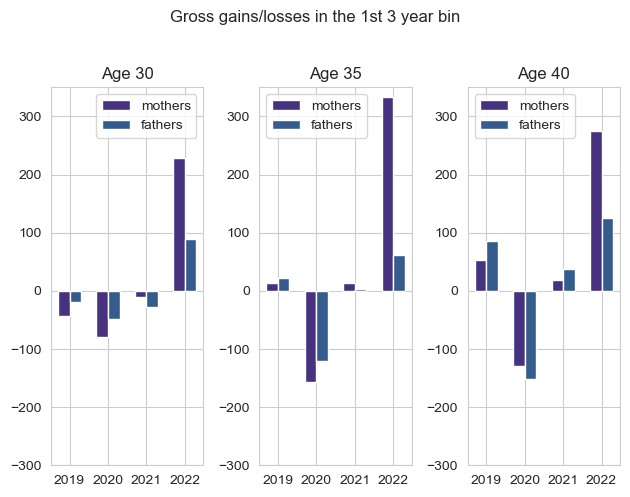

In [40]:
ww = 0.3
for j,age in enumerate([30,35,40]):
    plt.subplot(131+j)
    plt.title('Age {}'.format(age))
    plt.bar(np.arange(4),diff_first_gross_w[j,:], width=ww,label='mothers')
    plt.bar(np.arange(ww,4+ww),diff_first_gross_m[j,:], width=ww,label='fathers')
    plt.suptitle('Gross gains/losses in the 1st 3 year bin', y=1.025)
    plt.legend()
    plt.ylim(-300,350)
    plt.xticks(np.arange(ww/2,4+ww/2),years_range[-4:])
plt.tight_layout()
plt.show()

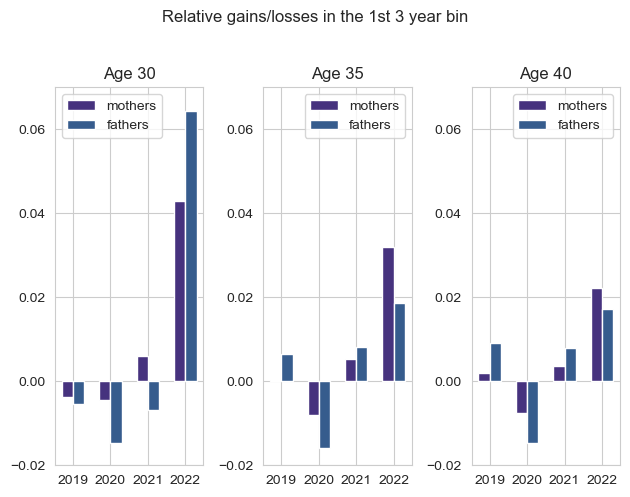

In [45]:
ww = 0.3
for j,age in enumerate([30,35,40]):
    plt.subplot(131+j)
    plt.title('Age {}'.format(age))
    plt.bar(np.arange(4),diff_first_w[j,:], width=ww,label='mothers')
    plt.bar(np.arange(ww,4+ww),diff_first_m[j,:], width=ww,label='fathers')
    plt.suptitle('Relative gains/losses in the 1st 3 year bin', y=1.025)
    plt.legend()
    plt.ylim(-0.02,0.07)
    plt.xticks(np.arange(ww/2,4+ww/2),years_range[-4:])
plt.tight_layout()
plt.show()

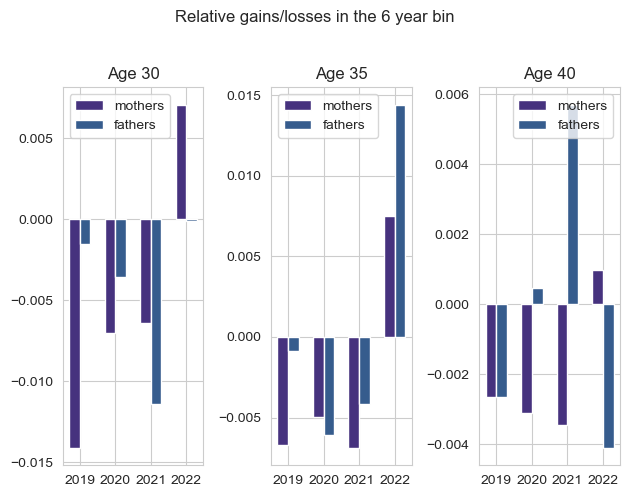

In [48]:
ww = 0.3
for j,age in enumerate([30,35,40]):
    plt.subplot(131+j)
    plt.title('Age {}'.format(age))
    plt.bar(np.arange(4),diff_50_w[j,:], width=ww,label='mothers')
    plt.bar(np.arange(ww,4+ww),diff_50_m[j,:], width=ww,label='fathers')
    plt.suptitle('Relative gains/losses in the 6 year bin', y=1.025)
    plt.legend()
#     plt.ylim(-0.04,0.06)
    plt.xticks(np.arange(ww/2,4+ww/2),years_range[-4:])
plt.tight_layout()
plt.show()

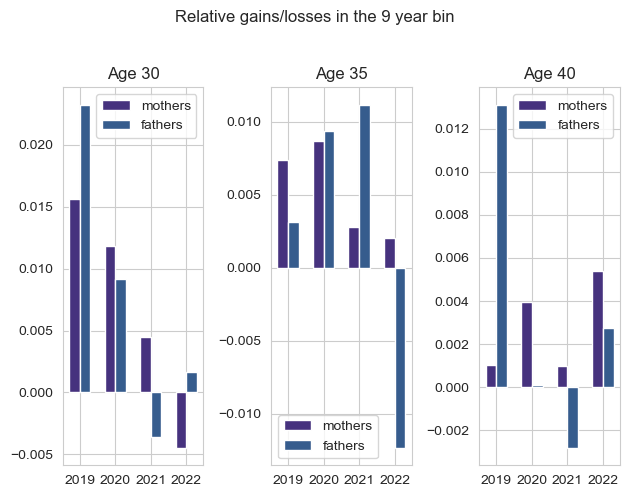

In [47]:
ww = 0.3
for j,age in enumerate([30,35,40]):
    plt.subplot(131+j)
    plt.title('Age {}'.format(age))
    plt.bar(np.arange(4),diff_75_w[j,:], width=ww,label='mothers')
    plt.bar(np.arange(ww,4+ww),diff_75_m[j,:], width=ww,label='fathers')
    plt.suptitle('Relative gains/losses in the 9 year bin', y=1.025)
    plt.legend()
#     plt.ylim(-0.04,0.06)
    plt.xticks(np.arange(ww/2,4+ww/2),years_range[-4:])
plt.tight_layout()
plt.show()

In [166]:
diff_first_m[:,1:] - diff_first_m[:,:-1]


array([[ 0.00197691, -0.024091  , -0.0313093 ,  0.05280561],
       [ 0.01786827, -0.01058697, -0.00060916,  0.01379939],
       [ 0.00565145, -0.01801911, -0.00099028,  0.02055556]])

 - All lines in one plot, x-axis is tenure
 - Absolute numbers
 - 2019 base year for all